# Multiplicators

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from sklearn import covariance

import datetime as dt
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pk
import requests

import random

jtplot.style(figsize=(15, 9))

In [3]:
d = {'Symbol': 'MMM', 'AssetType': 'Common Stock', 'Name': '3M Company',
     'Description': 'ood, a suburb of Saint Paul, Minnesota.',
     'CIK': '66740', 'Exchange': 'NYSE', 'Currency': 'USD',
     'Country': 'USA', 'Sector': 'LIFE SCIENCES',
     'Industry': 'SURGICAL & MEDICAL INSTRUMENTS & APPARATUS',
     'Address': '3M CENTER, BLDG. 220-13E-26A, ST PAUL, MN, US',
     'FiscalYearEnd': 'December', 'LatestQuarter': '2024-03-31',
     'MarketCapitalization': '57903698000', 'EBITDA': '8146000000',
     'PERatio': 'None', 'PEGRatio': '1.905', 'BookValue': '8.79',
     'DividendPerShare': '6.01', 'DividendYield': '0.0268',
     'EPS': '-12.73', 'RevenuePerShareTTM': '58.89',
     'ProfitMargin': '-0.216', 'OperatingMarginTTM': '0.217',
     'ReturnOnAssetsTTM': '0.0758', 'ReturnOnEquityTTM': '-0.693',
     'RevenueTTM': '32653001000', 'GrossProfitTTM': '15000000000',
     'DilutedEPSTTM': '-12.73', 'QuarterlyEarningsGrowthYOY': '-0.051',
     'QuarterlyRevenueGrowthYOY': '-0.003', '52WeekHigh': '105.31',
     '52WeekLow': '68.63',
     
     'AnalystTargetPrice': '110',
     'AnalystRatingStrongBuy': '0', 'AnalystRatingBuy': '5',
     'AnalystRatingHold': '11', 'AnalystRatingSell': '2',
     'AnalystRatingStrongSell': '0', 'TrailingPE': '-',
     'ForwardPE': '10.6', 'PriceToSalesRatioTTM': '1.546',
     'PriceToBookRatio': '10.51', 'EVToRevenue': '1.879',
     'EVToEBITDA': '-9.08', 'Beta': '1.001', '50DayMovingAverage': '101.16',
     '200DayMovingAverage': '97.91', 'SharesOutstanding': '553361000',
     'DividendDate': '2024-06-12', 'ExDividendDate': '2024-05-23'}
d.keys()

dict_keys(['Symbol', 'AssetType', 'Name', 'Description', 'CIK', 'Exchange', 'Currency', 'Country', 'Sector', 'Industry', 'Address', 'FiscalYearEnd', 'LatestQuarter', 'MarketCapitalization', 'EBITDA', 'PERatio', 'PEGRatio', 'BookValue', 'DividendPerShare', 'DividendYield', 'EPS', 'RevenuePerShareTTM', 'ProfitMargin', 'OperatingMarginTTM', 'ReturnOnAssetsTTM', 'ReturnOnEquityTTM', 'RevenueTTM', 'GrossProfitTTM', 'DilutedEPSTTM', 'QuarterlyEarningsGrowthYOY', 'QuarterlyRevenueGrowthYOY', 'AnalystTargetPrice', 'AnalystRatingStrongBuy', 'AnalystRatingBuy', 'AnalystRatingHold', 'AnalystRatingSell', 'AnalystRatingStrongSell', 'TrailingPE', 'ForwardPE', 'PriceToSalesRatioTTM', 'PriceToBookRatio', 'EVToRevenue', 'EVToEBITDA', 'Beta', '52WeekHigh', '52WeekLow', '50DayMovingAverage', '200DayMovingAverage', 'SharesOutstanding', 'DividendDate', 'ExDividendDate'])

In [2]:
multps = {
    'capital'  : ['MarketCapitalization', 'EBITDA', 'BookValue', 'RevenueTTM', 'GrossProfitTTM', ],
    'ratio'    : ['PERatio', 'PEGRatio',],
    'dividend' : ['DividendPerShare', 'DividendYield', 'EPS', 'RevenuePerShareTTM', 'DilutedEPSTTM',],
    'margin'   : ['ProfitMargin', 'OperatingMarginTTM',],
    'returns'  : ['ReturnOnAssetsTTM', 'ReturnOnEquityTTM', 'QuarterlyEarningsGrowthYOY', 'QuarterlyRevenueGrowthYOY'],
    'price'    : ['52WeekHigh', '52WeekLow',]
}

In [3]:
data = pd.read_csv('../../data/sp500_Company_Overview.csv', index_col=0)
data.head()

,AssetType,Name,Description,CIK,Exchange,Currency,Country,Sector,Industry,Address,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
MMM,Common Stock,3M Company,The 3M Company is an American multinational co...,66740.0,NYSE,USD,USA,LIFE SCIENCES,SURGICAL & MEDICAL INSTRUMENTS & APPARATUS,"3M CENTER, BLDG. 220-13E-26A, ST PAUL, MN, US",...,1.879,-9.08,1.001,105.52,68.63,101.50,98.13,5.533610e+08,2024-06-12,2024-05-23
AOS,Common Stock,Smith AO Corporation,A. O. Smith Corporation is an American manufac...,91142.0,NYSE,USD,USA,MANUFACTURING,HOUSEHOLD APPLIANCES,"11270 WEST PARK PLACE, MILWAUKEE, WI, US",...,3.248,15.19,1.141,92.44,63.34,83.92,81.37,1.207840e+08,2024-08-15,2024-07-31
ABT,Common Stock,Abbott Laboratories,Abbott Laboratories is an American multination...,1800.0,NYSE,USD,USA,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,"100 ABBOTT PARK ROAD, ABBOTT PARK, IL, US",...,4.928,18.75,0.718,120.40,88.33,103.84,106.60,1.739630e+09,2024-08-15,2024-07-15
ABBV,Common Stock,AbbVie Inc,AbbVie is an American publicly traded biopharm...,1551152.0,NYSE,USD,USA,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,"1 NORTH WAUKEGAN ROAD, NORTH CHICAGO, IL, US",...,6.15,19.45,0.623,179.55,132.11,166.45,162.53,1.765870e+09,2024-08-15,2024-07-15
ACN,Common Stock,Accenture plc,Accenture plc is an Irish-domiciled multinatio...,1467373.0,NYSE,USD,USA,TRADE & SERVICES,"SERVICES-BUSINESS SERVICES, NEC","1 GRAND CANAL SQUARE, GRAND CANAL HARBOUR, DUB...",...,3.041,18.21,1.227,384.33,277.47,301.44,329.36,6.263840e+08,2024-08-15,2024-07-11


In [4]:
data.drop(['AssetType',
           'CIK',
           'Description',
           'Currency',
           'Country',
           'Address',
           'DividendPerShare'
          ], inplace=True, axis=1)

In [5]:
data.replace('None', np.nan, inplace=True)

In [6]:
data['MarketCapitalization'] = data['MarketCapitalization'].astype(float)
data['Beta'] = data['Beta'].astype(float)
data['PEGRatio'] = data['PEGRatio'].astype(float)
data['PERatio'] = data['PERatio'].astype(float)
data['BookValue'] = data['BookValue'].astype(float)
data['DividendYield'] = data['DividendYield'].astype(float)
data['EPS'] = data['EPS'].astype(float)
data['RevenuePerShareTTM'] = data['RevenuePerShareTTM'].astype(float)
data['ProfitMargin'] = data['ProfitMargin'].astype(float)
data['OperatingMarginTTM'] = data['OperatingMarginTTM'].astype(float)
data['ReturnOnAssetsTTM'] = data['ReturnOnAssetsTTM'].astype(float)
data['EBITDA'] = data['EBITDA'].astype(float)
data['RevenueTTM'] = data['RevenueTTM'].astype(float)
data['GrossProfitTTM'] = data['GrossProfitTTM'].astype(float)
data['DilutedEPSTTM'] = data['DilutedEPSTTM'].astype(float)
data['QuarterlyEarningsGrowthYOY'] = data['QuarterlyEarningsGrowthYOY'].astype(float)
data['QuarterlyRevenueGrowthYOY'] = data['QuarterlyRevenueGrowthYOY'].astype(float)
data['52WeekHigh'] = data['52WeekHigh'].astype(float)
data['52WeekLow'] = data['52WeekLow'].astype(float)

## Multiplicators

In [7]:
clmns = ['Name',
         'MarketCapitalization',
         'Sector',
         'Industry',
         'BookValue',
         'PERatio',
         'PEGRatio',
         'EPS',
         'Beta',
         'DividendYield',
         'RevenuePerShareTTM',
         'RevenueTTM',
        ]

In [7]:
cat = data.copy()

### Helpers

In [8]:
def multiplicators_info(mult):
    return {
        'describe': data[mult].describe(),
        'dist': sns.displot(data=data, x=mult, kind='kde'),
    }

### Market Capitalization

Market capitalization shows how much a company is worth as determined by the total market value of all outstanding shares.<br><br>

$\displaystyle
Market\ Capitalization=Current\ Share\ Price*Total\ Number\ of\ Shares\ Outstanding
$

{'describe': count    5.030000e+02
 mean     1.016668e+11
 std      3.101198e+11
 min      6.665545e+09
 25%      1.872197e+10
 50%      3.596841e+10
 75%      7.340075e+10
 max      3.450326e+12
 Name: MarketCapitalization, dtype: float64,
 'dist': <seaborn.axisgrid.FacetGrid at 0xe81c778>}

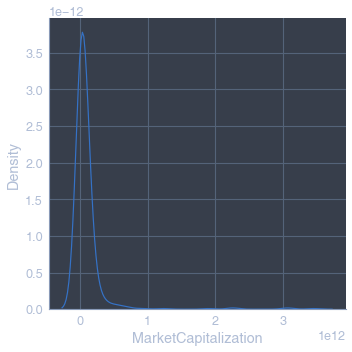

In [15]:
multiplicators_info('MarketCapitalization')

In [8]:
market_cap = data['MarketCapitalization']
bins = pd.cut(market_cap, 3)
results = (pd.Series(market_cap).groupby(bins).agg(['count', 'min', 'idxmin', 'max', 'idxmax']).reset_index())
results

,MarketCapitalization,count,min,idxmin,max,idxmax
0,"(3221884848.0, 1154552262333.333]",496,6.665545e+09,AAL,9.302838e+11,BRK-B
1,"(1154552262333.333, 2302438979666.666]",4,1.234906e+12,META,2.254508e+12,GOOG
2,"(2302438979666.666, 3450325697000.0]",3,3.036322e+12,MSFT,3.450326e+12,AAPL


In [9]:
cat['market_cap_bins'] = bins
cat.groupby(['Sector', 'market_cap_bins']).agg(['count', 'min', 'idxmin', 'max', 'idxmax'])['MarketCapitalization']

count  \
Sector                     market_cap_bins                                 
ENERGY & TRANSPORTATION    (3221884848.0, 1154552262333.333]          76   
                           (1154552262333.333, 2302438979666.666]      0   
                           (2302438979666.666, 3450325697000.0]        0   
FINANCE                    (3221884848.0, 1154552262333.333]          65   
                           (1154552262333.333, 2302438979666.666]      0   
                           (2302438979666.666, 3450325697000.0]        0   
LIFE SCIENCES              (3221884848.0, 1154552262333.333]          80   
                           (1154552262333.333, 2302438979666.666]      0   
                           (2302438979666.666, 3450325697000.0]        0   
MANUFACTURING              (3221884848.0, 1154552262333.333]          95   
                           (1154552262333.333, 2302438979666.666]      0   
                           (2302438979666.666, 3450325697000.0]        1   
REAL ESTATE & CONSTRUCTION (3221884848.0, 1154552262333.333]          42   
                           (1154552262333.333, 2302438979666.666]      0   
                           (2302438979666.666, 3450325697000.0]        0   
TECHNOLOGY                 (3221884848.0, 1154552262333.333]          64   
                           (1154552262333.333, 2302438979666.666]      3   
                           (2302438979666.666, 3450325697000.0]        2   
TRADE & SERVICES           (3221884848.0, 1154552262333.333]          74   
                           (1154552262333.333, 2302438979666.666]      1   
                           (2302438979666.666, 3450325697000.0]        0   

                                                                            min  \
Sector                     market_cap_bins                                        
ENERGY & TRANSPORTATION    (3221884848.0, 1154552262333.333]       6.665545e+09   
                           (1154552262333.333, 2302438979666.666]           NaN   
                           (2302438979666.666, 3450325697000.0]             NaN   
FINANCE                    (3221884848.0, 1154552262333.333]       7.569538e+09   
                           (1154552262333.333, 2302438979666.666]           NaN   
                           (2302438979666.666, 3450325697000.0]             NaN   
LIFE SCIENCES              (3221884848.0, 1154552262333.333]       8.127291e+09   
                           (1154552262333.333, 2302438979666.666]           NaN   
                           (2302438979666.666, 3450325697000.0]             NaN   
MANUFACTURING              (3221884848.0, 1154552262333.333]       7.283981e+09   
                           (1154552262333.333, 2302438979666.666]           NaN   
                           (2302438979666.666, 3450325697000.0]    3.089792e+12   
REAL ESTATE & CONSTRUCTION (3221884848.0, 1154552262333.333]       7.183762e+09   
                           (1154552262333.333, 2302438979666.666]           NaN   
                           (2302438979666.666, 3450325697000.0]             NaN   
TECHNOLOGY                 (3221884848.0, 1154552262333.333]       7.502204e+09   
                           (1154552262333.333, 2302438979666.666]  1.234906e+12   
                           (2302438979666.666, 3450325697000.0]    3.036322e+12   
TRADE & SERVICES           (3221884848.0, 1154552262333.333]       7.493067e+09   
                           (1154552262333.333, 2302438979666.666]  1.899725e+12   
                           (2302438979666.666, 3450325697000.0]             NaN   

                                                                  idxmin  \
Sector                     market_cap_bins                                 
ENERGY & TRANSPORTATION    (3221884848.0, 1154552262333.333]         AAL   
                           (1154552262333.333, 2302438979666.666]    NaN   
                           (2302438979666.666, 3450325697000.0]      NaN   
FINANCE                    (

In [10]:
data.sort_values(by='MarketCapitalization', ascending=False).head(10)

,Name,Exchange,Sector,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,Apple Inc,NASDAQ,TECHNOLOGY,ELECTRONIC COMPUTERS,September,2024-03-31,3.450326e+12,1.296290e+11,34.94,2.351,...,9.11,26.13,1.244,237.23,163.86,207.76,187.90,1.533410e+10,2024-05-16,2024-05-10
NVDA,NVIDIA Corporation,NASDAQ,MANUFACTURING,SEMICONDUCTORS & RELATED DEVICES,January,2024-04-30,3.089792e+12,4.927500e+10,58.70,1.407,...,35.83,56.4,1.680,140.76,39.22,120.66,87.28,2.459830e+10,2024-06-28,2024-06-11
MSFT,Microsoft Corporation,NASDAQ,TECHNOLOGY,SERVICES-PREPACKAGED SOFTWARE,June,2024-06-30,3.036322e+12,1.294330e+11,34.59,2.200,...,12.35,22.76,0.894,468.35,307.70,438.57,403.82,7.433040e+09,2024-09-12,2024-08-15
GOOG,Alphabet Inc Class C,NASDAQ,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",December,2024-03-31,2.254508e+12,1.097230e+11,28.08,1.659,...,6.14,19.27,1.046,193.31,121.32,180.07,152.99,5.617000e+09,2024-06-17,2024-06-10
GOOGL,Alphabet Inc Class A,NASDAQ,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",December,2024-03-31,2.254507e+12,1.097230e+11,27.86,1.669,...,6.99,20.42,1.046,191.75,120.07,179.13,152.33,5.874000e+09,2024-06-17,2024-06-10
AMZN,Amazon.com Inc,NASDAQ,TRADE & SERVICES,RETAIL-CATALOG & MAIL-ORDER HOUSES,December,2024-03-31,1.899725e+12,9.660900e+10,50.99,1.987,...,3.268,19.57,1.155,201.20,118.35,187.51,167.96,1.040660e+10,None,None
META,Meta Platforms Inc.,NASDAQ,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",December,2024-06-30,1.234906e+12,7.477400e+10,24.94,1.130,...,8.11,16.48,1.212,542.81,273.82,492.57,433.53,2.184730e+09,2024-06-26,2024-06-14
BRK-B,Berkshire Hathaway Inc,NYSE,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",December,2024-03-31,9.302838e+11,1.070460e+11,12.73,10.060,...,2.189,-,0.869,449.25,330.58,414.31,387.93,1.311380e+09,None,None
LLY,Eli Lilly and Company,NYSE,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,December,2024-03-31,7.243399e+11,1.337370e+10,117.78,1.304,...,20.82,77.19,0.409,966.10,447.24,867.06,726.83,9.004050e+08,2024-09-10,2024-08-15


In [17]:
data.sort_values(by='MarketCapitalization').head(10)

,Name,Exchange,Sector,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
AAL,American Airlines Group,NASDAQ,ENERGY & TRANSPORTATION,"AIR TRANSPORTATION, SCHEDULED",December,2024-06-30,6.665545e+09,5.150000e+09,NaN,0.220,...,0.705,18.86,1.450,16.15,9.07,10.54,13.00,656704000.0,2020-02-19,2020-02-04
NCLH,Norwegian Cruise Line Holdings Ltd,NYSE,ENERGY & TRANSPORTATION,WATER TRANSPORTATION,December,2024-03-31,7.004214e+09,2.153200e+09,16.42,0.311,...,2.184,9.23,2.697,21.73,12.71,17.99,17.49,439687000.0,None,None
CZR,Caesars Entertainment Corporation,NASDAQ,REAL ESTATE & CONSTRUCTION,HOTELS & MOTELS,December,2024-03-31,7.183762e+09,3.714000e+09,9.39,0.824,...,2.84,9.21,2.985,59.50,31.74,36.61,41.25,216053000.0,None,None
BWA,BorgWarner Inc,NYSE,MANUFACTURING,MOTOR VEHICLE PARTS & ACCESSORIES,December,2024-03-31,7.283981e+09,1.857000e+09,10.99,1.000,...,0.714,6.16,1.209,46.16,29.31,34.03,34.11,227838000.0,2024-06-17,2024-06-03
ETSY,Etsy Inc,NASDAQ,TRADE & SERVICES,"SERVICES-BUSINESS SERVICES, NEC",December,2024-03-31,7.493067e+09,4.262970e+08,29.26,1.109,...,3.342,23.06,2.020,97.44,55.08,61.42,68.39,116933000.0,None,None
PARA,Paramount Global Class B,NASDAQ,TECHNOLOGY,TELEVISION BROADCASTING STATIONS,December,2024-03-31,7.502204e+09,2.715000e+09,NaN,0.291,...,0.706,23.38,1.798,17.28,9.54,11.24,12.44,625998000.0,2024-10-01,2024-09-16
IVZ,Invesco Plc,NYSE,FINANCE,INVESTMENT ADVICE,December,2024-06-30,7.569538e+09,1.015800e+09,NaN,1.488,...,3.152,15.93,1.455,17.81,11.97,15.66,15.49,450032000.0,2024-09-04,2024-08-16
BBWI,Bath & Body Works Inc.,NYSE,TRADE & SERVICES,RETAIL-WOMEN'S CLOTHING STORES,January,2024-04-30,7.667985e+09,1.568000e+09,8.88,0.858,...,1.654,7.47,1.834,52.76,26.90,43.09,41.33,223231000.0,2024-06-21,2024-06-07
FMC,FMC Corporation,NYSE,LIFE SCIENCES,CHEMICALS & ALLIED PRODUCTS,December,2024-06-30,8.127291e+09,6.765000e+08,5.57,1.846,...,2.897,28.22,0.843,84.13,48.09,59.35,58.77,124824000.0,2024-10-17,2024-09-30


### EBITDA

Earnings before interest, taxes, depreciation, and amortization, is an alternate measure of profitability to net income.<br><br>

$\displaystyle
EBITDA=Net\ Income+Taxes+Interest\ Expense+Deprication\ and\ Amortization
$

In [14]:
data['EBITDA'].describe()

count    4.570000e+02
mean     6.760717e+09
std      1.466607e+10
min     -4.107000e+09
25%      1.594898e+09
50%      2.849000e+09
75%      5.944000e+09
max      1.296290e+11
Name: EBITDA, dtype: float64

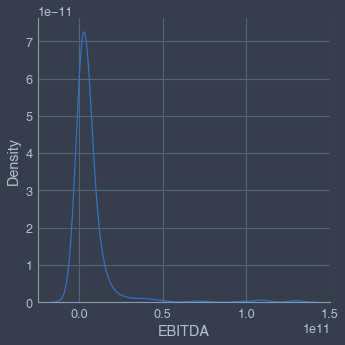

In [56]:
sns.displot(data=data, x='EBITDA', kind='kde')

In [15]:
data[data['EBITDA']<0]

,Name,Exchange,Sector,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
ALB,Albemarle Corp,NYSE,LIFE SCIENCES,"PLASTIC MATERIALS, SYNTH RESINS & NONVULCAN EL...",December,2024-03-31,1.099700e+10,-3.170970e+08,33.9,1.508,...,1.851,22.45,1.575,213.26,90.02,110.11,123.88,117527000.0,2024-10-01,2024-09-13
MRNA,Moderna Inc,NASDAQ,LIFE SCIENCES,"BIOLOGICAL PRODUCTS, (NO DISGNOSTIC SUBSTANCES)",December,2024-06-30,3.328101e+10,-4.107000e+09,NaN,0.000,...,5.22,4.641,1.662,170.47,62.55,131.38,105.61,384396000.0,None,None


In [11]:
ebitda_cat = data['EBITDA']
bins = pd.cut(ebitda_cat, 4)
results = (pd.Series(ebitda_cat).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,EBITDA,count,min,max
0,"(-4240736068.064, 29327000952.0]",458,-4.107000e+09,2.611600e+10
1,"(29327000952.0, 62761001968.0]",10,2.998900e+10,4.927500e+10
2,"(62761001968.0, 96195002984.0]",2,6.768900e+10,7.477400e+10
3,"(96195002984.0, 129629004000.0]",6,9.660900e+10,1.296290e+11


In [22]:
cat['ebitda_cat_bins'] = bins
cat.groupby(['Sector', 'ebitda_cat_bins']).count()['Name'].to_frame()

Name
Sector                     ebitda_cat_bins                       
ENERGY & TRANSPORTATION    (-4240736068.064, 29327000952.0]    74
                           (29327000952.0, 62761001968.0]       1
                           (62761001968.0, 96195002984.0]       1
                           (96195002984.0, 129629004000.0]      0
FINANCE                    (-4240736068.064, 29327000952.0]    36
                           (29327000952.0, 62761001968.0]       1
                           (62761001968.0, 96195002984.0]       0
                           (96195002984.0, 129629004000.0]      1
LIFE SCIENCES              (-4240736068.064, 29327000952.0]    78
                           (29327000952.0, 62761001968.0]       2
                           (62761001968.0, 96195002984.0]       0
                           (96195002984.0, 129629004000.0]      0
MANUFACTURING              (-4240736068.064, 29327000952.0]    95
                           (29327000952.0, 62761001968.0]       1
                           (62761001968.0, 96195002984.0]       0
                           (96195002984.0, 129629004000.0]      0
REAL ESTATE & CONSTRUCTION (-4240736068.064, 29327000952.0]    42
                           (29327000952.0, 62761001968.0]       0
                           (62761001968.0, 96195002984.0]       0
                           (96195002984.0, 129629004000.0]      0
TECHNOLOGY                 (-4240736068.064, 29327000952.0]    60
                           (29327000952.0, 62761001968.0]       4
                           (62761001968.0, 96195002984.0]       1
                           (96195002984.0, 129629004000.0]      4
TRADE & SERVICES           (-4240736068.064, 29327000952.0]    73
                           (29327000952.0, 62761001968.0]       1
                           (62761001968.0, 96195002984.0]       0
                           (96195002984.0, 129629004000.0]      1

In [13]:
data.groupby(['Sector']).agg({'EBITDA': ['min', 'idxmin', 'max', 'idxmax'],
                              'Name': 'count'})

EBITDA                              Name
                                     min idxmin           max idxmax count
Sector                                                                    
ENERGY & TRANSPORTATION     6.076360e+08   CHRW  6.768900e+10    XOM    76
FINANCE                     3.844590e+08   MKTX  1.070460e+11  BRK-B    65
LIFE SCIENCES              -4.107000e+09   MRNA  3.305500e+10    MRK    80
MANUFACTURING               1.694130e+08   ENPH  4.927500e+10   NVDA    96
REAL ESTATE & CONSTRUCTION  7.140900e+08    FRT  7.003500e+09    AMT    42
TECHNOLOGY                  1.451520e+08   CRWD  1.296290e+11   AAPL    69
TRADE & SERVICES            1.580340e+08   INCY  9.660900e+10   AMZN    75

In [31]:
data.sort_values(by='EBITDA', ascending=False)[clmns].head(10)

,Name,MarketCapitalization,Sector,Industry,BookValue,PERatio,PEGRatio,Beta,DividendPerShare,DividendYield
Symbol,,,,,,,,,,
AAPL,Apple Inc,3.450326e+12,TECHNOLOGY,ELECTRONIC COMPUTERS,4.837,34.94,2.351,1.244,4.837,0.0044
MSFT,Microsoft Corporation,3.036322e+12,TECHNOLOGY,SERVICES-PREPACKAGED SOFTWARE,36.120,34.59,2.200,0.894,36.120,0.0073
GOOGL,Alphabet Inc Class A,2.254507e+12,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",23.650,27.86,1.669,1.046,23.650,0.0044
GOOG,Alphabet Inc Class C,2.254508e+12,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",23.650,28.08,1.659,1.046,23.650,0.0044
BRK-B,Berkshire Hathaway Inc,9.302838e+11,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",397506.280,12.73,10.060,0.869,397506.280,NaN
AMZN,Amazon.com Inc,1.899725e+12,TRADE & SERVICES,RETAIL-CATALOG & MAIL-ORDER HOUSES,20.830,50.99,1.987,1.155,20.830,NaN
META,Meta Platforms Inc.,1.234906e+12,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",61.890,24.94,1.130,1.212,61.890,0.0041
XOM,Exxon Mobil Corp,5.208165e+11,ENERGY & TRANSPORTATION,PETROLEUM REFINING,52.050,14.23,7.050,0.893,52.050,0.0327
VZ,Verizon Communications Inc,1.715379e+11,TECHNOLOGY,TELEPHONE COMMUNICATIONS (NO RADIOTELEPHONE),22.850,15.32,1.158,0.393,22.850,0.0653


### PERatio

The price-to-earnings (P/E) ratio measures a company's share price relative to its earnings per share (EPS)
<br><br>
$\displaystyle
P/E\ ratio = \frac{Market\ value\ per\ share}{Earning\ per\ share}
$

In [19]:
data['PERatio'].describe()

count    452.000000
mean      32.480071
std       34.380641
min        3.444000
25%       16.375000
50%       24.350000
75%       35.802500
max      474.370000
Name: PERatio, dtype: float64

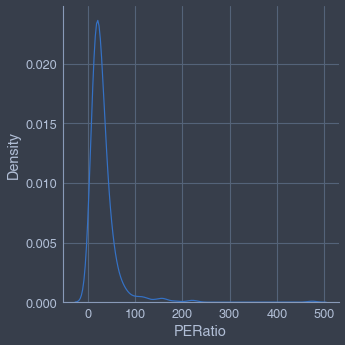

In [61]:
sns.displot(data=data, x='PERatio', kind='kde')

{'bodies': [<matplotlib.collections.PolyCollection at 0x146bcd00>],
 'cmeans': <matplotlib.collections.LineCollection at 0x146a92c8>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x146bcf40>,
 'cmins': <matplotlib.collections.LineCollection at 0x146cd0e8>,
 'cbars': <matplotlib.collections.LineCollection at 0x146cd268>,
 'cmedians': <matplotlib.collections.LineCollection at 0x146cd3e8>}

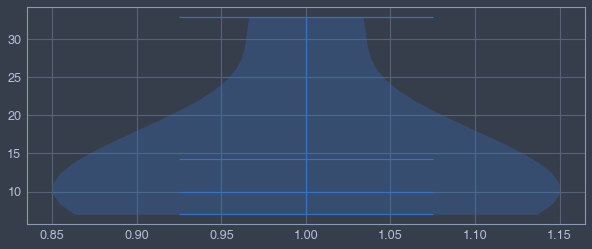

In [82]:
# fig, ax = plt.subplots(1, figsize=(10, 4))

# ax.violinplot(d, [1], points=20, widths=0.3,
#                      showmeans=True, showextrema=True, showmedians=True)

In [27]:
data[data['PERatio']<15].groupby(['Sector']).agg({'Name': 'count',
                                                  'PERatio': ['min', 'idxmin', 'mean', 'max', 'idxmax']})

Name PERatio                                
                           count     min idxmin       mean    max idxmax
Sector                                                                  
ENERGY & TRANSPORTATION       17   3.444    APA  10.336588  14.99   CTRA
FINANCE                       31   5.670     EG  11.905161  14.80    BAC
LIFE SCIENCES                  6   7.510     CE  11.306667  14.57    LYB
MANUFACTURING                 15   4.970     GM  10.261333  14.23     SW
REAL ESTATE & CONSTRUCTION     6   9.390    CZR  10.933333  13.34    MGM
TECHNOLOGY                     9   9.790      T  11.745556  13.88    HPE
TRADE & SERVICES              10   8.880   BBWI  12.262000  14.67   PYPL

In [20]:
data[(data['PERatio']<15) & (data['Sector']=='TECHNOLOGY')][clmns]

,Name,MarketCapitalization,Sector,Industry,BookValue,PERatio,PEGRatio,Beta,DividendYield
Symbol,,,,,,,,,
T,AT&T Inc,1.305688e+11,TECHNOLOGY,TELEPHONE COMMUNICATIONS (NO RADIOTELEPHONE),14.580,9.79,1.272,0.720,0.0610
CHTR,Charter Communications Inc,5.294831e+10,TECHNOLOGY,CABLE & OTHER PAY TELEVISION SERVICES,76.340,11.74,0.277,1.041,NaN
CMCSA,Comcast Corp,1.536995e+11,TECHNOLOGY,CABLE & OTHER PAY TELEVISION SERVICES,21.440,10.56,0.642,1.003,0.0312
DE,Deere & Company,1.065216e+11,TECHNOLOGY,FARM MACHINERY & EQUIPMENT,82.320,11.64,2.276,0.940,0.0152
FOXA,Fox Corp Class A,1.702525e+10,TECHNOLOGY,TELEVISION BROADCASTING STATIONS,22.540,12.12,1.009,0.781,0.0135
FOX,Fox Corp Class B,1.702762e+10,TECHNOLOGY,TELEVISION BROADCASTING STATIONS,22.540,11.29,0.927,0.781,0.0145
GDDY,Godaddy Inc,2.033356e+10,TECHNOLOGY,SERVICES-COMPUTER INTEGRATED SYSTEMS DESIGN,2.912,12.50,1.101,1.140,NaN
HPE,Hewlett Packard Enterprise Co,2.522665e+10,TECHNOLOGY,COMPUTER & OFFICE EQUIPMENT,16.700,13.88,2.080,1.211,0.0274
HPQ,HP Inc,3.531623e+10,TECHNOLOGY,COMPUTER & OFFICE EQUIPMENT,-0.936,12.19,8.510,1.106,0.0305


In [26]:
data[data['PERatio']>15].groupby(['Sector']).agg({'Name': 'count',
                                                  'PERatio': ['min', 'idxmin', 'mean', 'max', 'idxmax']})

Name PERatio                                 
                           count     min idxmin       mean     max idxmax
Sector                                                                   
ENERGY & TRANSPORTATION       51   15.22    PCG  26.001765  187.08    LUV
FINANCE                       30   15.03    WRB  26.095000   55.20    AJG
LIFE SCIENCES                 60   15.58    DVA  42.656833  216.81   GILD
MANUFACTURING                 71   15.71     ON  36.767465  225.90    AMD
REAL ESTATE & CONSTRUCTION    34   16.52    HST  47.112059  165.97    IRM
TECHNOLOGY                    53   15.32     VZ  48.018679  474.37   CRWD
TRADE & SERVICES              59   15.02    TGT  37.201356  158.71   INCY

### PEGRatio

The price/earnings to growth ratio (PEG ratio) is a stock's price-to-earnings (P/E) ratio divided by the growth rate of its earnings for a specified time period.<br><br>

$\displaystyle
PEG\ ratio=\frac{Price\ /EPS}{EPS\ Growth}
$

In [22]:
data['PEGRatio'].describe()

count    478.000000
mean       5.230321
std       45.326822
min     -158.720000
25%        1.190750
50%        1.870000
75%        2.967500
max      844.200000
Name: PEGRatio, dtype: float64

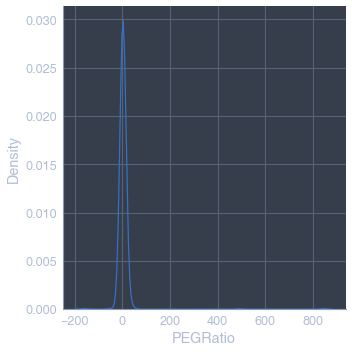

In [8]:
sns.displot(data=data, x='PEGRatio', kind='kde')

In [25]:
data[data['PEGRatio']<1].groupby(['Sector']).agg({'Name': 'count',
                                                 'PEGRatio': ['min', 'idxmin', 'mean', 'max', 'idxmax']})

Name PEGRatio                                
                           count      min idxmin       mean    max idxmax
Sector                                                                   
ENERGY & TRANSPORTATION       15    0.170    APA   0.523200  0.956    FDX
FINANCE                       17 -158.720   CINF -11.739118  0.992   NTRS
LIFE SCIENCES                 11    0.000   MRNA   0.423418  0.888    JNJ
MANUFACTURING                 17    0.406   FSLR   0.732941  0.980    TDY
REAL ESTATE & CONSTRUCTION     7   -4.530    UDR  -0.093571  0.902      J
TECHNOLOGY                     9    0.277   CHTR   0.655000  0.960    BKR
TRADE & SERVICES               9    0.309    CAH   0.694667  0.995    CVS

In [24]:
data[data['PEGRatio']<0]

,Name,Exchange,Sector,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
CINF,Cincinnati Financial Corporation,NASDAQ,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",December,2024-06-30,1.940693e+10,2.849000e+09,9.09,-158.72,...,1.853,-,0.658,128.23,94.82,117.83,111.77,156240000.0,2024-07-15,2024-06-18
EG,Everest Group Ltd,NYSE,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",December,2024-03-31,1.668795e+10,NaN,5.67,-50.00,...,1.22,-,0.627,413.04,337.07,382.59,380.15,43458200.0,2024-06-14,2024-05-29
MOH,Molina Healthcare Inc,NYSE,FINANCE,HOSPITAL & MEDICAL SERVICE PLANS,December,2024-06-30,2.056274e+10,1.701000e+09,19.23,-0.62,...,0.381,8.33,0.579,423.92,282.96,308.99,354.36,58600000.0,None,None
UDR,UDR Inc,NYSE,REAL ESTATE & CONSTRUCTION,REAL ESTATE INVESTMENT TRUSTS,December,2024-06-30,1.553992e+10,9.984390e+08,102.12,-4.53,...,11.99,19.17,0.820,42.42,29.95,40.58,37.41,329824000.0,2024-07-31,2024-07-10


### BookValue

Book value is the value of a company's assets after netting out its liabilities. It approximates the total value shareholders would receive if the company were liquidated.

In [25]:
data['BookValue'].describe()

count       480.000000
mean        867.945490
std       18141.931073
min        -282.210000
25%          13.810000
50%          27.700000
75%          51.415000
max      397506.280000
Name: BookValue, dtype: float64

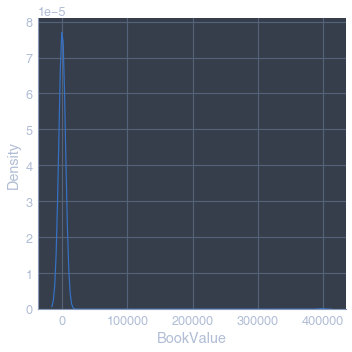

In [12]:
sns.displot(data=data, x='BookValue', kind='kde')

In [24]:
data.groupby(['Sector']).agg({'Name': 'count',
                              'BookValue': ['min', 'idxmin', 'mean', 'max', 'idxmax']})

Name BookValue                                 \
                           count       min idxmin         mean        max   
Sector                                                                      
ENERGY & TRANSPORTATION       70   -118.94   BKNG    33.130100     143.98   
FINANCE                       63     -0.67    AON  6380.612381  397506.28   
LIFE SCIENCES                 77     -7.18    MTD    43.232079     317.32   
MANUFACTURING                 94    -44.90    TDG    34.365419     198.53   
REAL ESTATE & CONSTRUCTION    41    -49.47   SBAC    66.788976    1337.72   
TECHNOLOGY                    66    -18.54   VRSN    30.866182      93.20   
TRADE & SERVICES              72   -282.21    AZO    14.915634     125.02   

                                   
                           idxmax  
Sector                             
ENERGY & TRANSPORTATION       MLM  
FINANCE                     BRK-B  
LIFE SCIENCES                 BIO  
MANUFACTURING                 TDY  
REAL ESTATE & CONSTRUCTION    NVR  
TECHNOLOGY                   SMCI  
TRADE & SERVICES              URI

In [36]:
bv_cat = data['BookValue']
bins = pd.qcut(bv_cat, 4)
results = (pd.Series(bv_cat).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,BookValue,count,min,max
0,"(-282.21099999999996, 13.81]",126,-282.21,13.81
1,"(13.81, 28.1]",124,13.84,28.02
2,"(28.1, 51.415]",125,28.18,51.38
3,"(51.415, 397506.28]",125,51.52,397506.28


In [37]:
cat['bv_cat_bins'] = bins
df = cat.groupby(['Sector', 'bv_cat_bins']).count()['Name'].to_frame()
df

Name
Sector                     bv_cat_bins                       
ENERGY & TRANSPORTATION    (-282.21099999999996, 13.81]    17
                           (13.81, 28.1]                   22
                           (28.1, 51.415]                  21
                           (51.415, 397506.28]             16
FINANCE                    (-282.21099999999996, 13.81]     4
                           (13.81, 28.1]                    9
                           (28.1, 51.415]                  20
                           (51.415, 397506.28]             32
LIFE SCIENCES              (-282.21099999999996, 13.81]    17
                           (13.81, 28.1]                   21
                           (28.1, 51.415]                  19
                           (51.415, 397506.28]             22
MANUFACTURING              (-282.21099999999996, 13.81]    26
                           (13.81, 28.1]                   25
                           (28.1, 51.415]                  22
                           (51.415, 397506.28]             22
REAL ESTATE & CONSTRUCTION (-282.21099999999996, 13.81]    14
                           (13.81, 28.1]                    6
                           (28.1, 51.415]                  10
                           (51.415, 397506.28]             12
TECHNOLOGY                 (-282.21099999999996, 13.81]    16
                           (13.81, 28.1]                   22
                           (28.1, 51.415]                  18
                           (51.415, 397506.28]             13
TRADE & SERVICES           (-282.21099999999996, 13.81]    32
                           (13.81, 28.1]                   19
                           (28.1, 51.415]                  15
                           (51.415, 397506.28]              8

In [29]:
df.pivot_table(values='Name', columns='bv_cat_bins', index='Sector')

bv_cat_bins,"(-282.21099999999996, 13.81]","(13.81, 27.7]","(27.7, 51.415]","(51.415, 397506.28]"
Sector,,,,
ENERGY & TRANSPORTATION,15,21,19,15
FINANCE,4,9,20,30
LIFE SCIENCES,17,21,16,22
MANUFACTURING,25,25,22,21
REAL ESTATE & CONSTRUCTION,14,5,10,12
TECHNOLOGY,15,21,18,12
TRADE & SERVICES,31,17,15,8


In [30]:
data.sort_values(by='BookValue', ascending=False)[clmns].head(10)

,Name,MarketCapitalization,Sector,Industry,BookValue,PERatio,PEGRatio,Beta,DividendPerShare,DividendYield
Symbol,,,,,,,,,,
BRK-B,Berkshire Hathaway Inc,9.302838e+11,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",397506.28,12.73,10.060,0.869,397506.28,NaN
NVR,NVR Inc,2.557458e+10,REAL ESTATE & CONSTRUCTION,OPERATIVE BUILDERS,1337.72,17.09,4.886,1.168,1337.72,NaN
GS,Goldman Sachs Group Inc,1.630599e+11,FINANCE,"SECURITY BROKERS, DEALERS & FLOTATION COMPANIES",322.16,16.21,3.144,1.364,322.16,0.0244
BIO,Bio-Rad Laboratories Inc,8.760474e+09,LIFE SCIENCES,LABORATORY ANALYTICAL INSTRUMENTS,317.32,NaN,1.190,0.930,317.32,NaN
EG,Everest Group Ltd,1.668795e+10,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",314.01,5.67,-50.000,0.627,314.01,0.0208
BLK,BlackRock Inc,1.226577e+11,FINANCE,"SECURITY BROKERS, DEALERS & FLOTATION COMPANIES",267.04,20.53,2.458,1.331,267.04,0.0246
REGN,Regeneron Pharmaceuticals Inc,1.180926e+11,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,261.41,28.33,1.604,0.128,261.41,NaN
TDY,Teledyne Technologies Incorporated,1.918994e+10,MANUFACTURING,"SEARCH, DETECTION, NAVAGATION, GUIDANCE, AERON...",198.53,22.33,0.980,1.000,198.53,NaN
ELV,Elevance Health Inc,1.223199e+11,FINANCE,HOSPITAL & MEDICAL SERVICE PLANS,181.94,18.48,1.138,0.847,181.94,0.0124


In [20]:
data[data['BookValue']<0].groupby('Sector').agg({
    'Name': 'count',
})

,Name
Sector,
ENERGY & TRANSPORTATION,1
FINANCE,1
LIFE SCIENCES,2
MANUFACTURING,6
REAL ESTATE & CONSTRUCTION,4
TECHNOLOGY,4
TRADE & SERVICES,14


### DividendYield

The dividend yield is a financial ratio that shows how much a company pays out in dividends each year relative to its stock price.<br><br>
$\displaystyle
Dividend\ Yield = \frac{Annual\ Dividends\ Per\ Share}{Price\ per\ Share}
$

In [7]:
data['DividendYield'].describe()

count    385.00000
mean       0.02344
std        0.01473
min        0.00000
25%        0.01180
50%        0.02100
75%        0.03310
max        0.09360
Name: DividendYield, dtype: float64

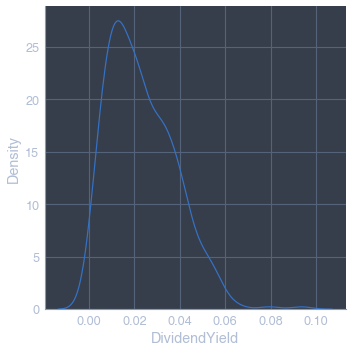

In [13]:
sns.displot(data=data, x='DividendYield', kind='kde')

In [23]:
data.groupby('Sector').agg({
    'DividendYield': ['min', 'idxmin', 'mean', 'max', 'idxmax']
})

DividendYield                                
                                     min idxmin      mean     max idxmax
Sector                                                                  
ENERGY & TRANSPORTATION           0.0022    PCG  0.028740  0.0546    KMI
FINANCE                           0.0019    PGR  0.024617  0.0544    BEN
LIFE SCIENCES                     0.0015   GEHC  0.019939  0.0565    PFE
MANUFACTURING                     0.0000    TDG  0.022269  0.0794     MO
REAL ESTATE & CONSTRUCTION        0.0015    PWR  0.030859  0.0582    CCI
TECHNOLOGY                        0.0041   META  0.017412  0.0653     VZ
TRADE & SERVICES                  0.0045    MCK  0.020474  0.0936    WBA

In [16]:
data[data['DividendYield']==data['DividendYield'].max()][clmns]

,Name,MarketCapitalization,Sector,Industry,BookValue,PERatio,PEGRatio,Beta,DividendYield
Symbol,,,,,,,,,
WBA,Walgreens Boots Alliance Inc,9.219778e+09,TRADE & SERVICES,RETAIL-DRUG STORES AND PROPRIETARY STORES,15.8,NaN,3.553,0.702,0.0936


In [17]:
data[data['DividendYield']==data['DividendYield'].min()][clmns]

,Name,MarketCapitalization,Sector,Industry,BookValue,PERatio,PEGRatio,Beta,DividendYield
Symbol,,,,,,,,,
TDG,Transdigm Group Incorporated,6.992042e+10,MANUFACTURING,"AIRCRAFT PARTS & AUXILIARY EQUIPMENT, NEC",-44.9,46.08,3.533,1.382,0.0


### EPS

Earnings per share (EPS) is a measure of a company's profitability that indicates how much profit each outstanding share of common stock has earned.<br><br>
$\displaystyle
EPS=\frac{Net\ Income − Pref.Div.\ (+or−)\ Extraordinary\ Items}{Weighted\ Average\ Common\ Shares}
$

In [8]:
data['EPS'].describe()

count    480.000000
mean       8.320500
std       24.702004
min      -22.010000
25%        2.360000
50%        4.985000
75%        9.100000
max      484.140000
Name: EPS, dtype: float64

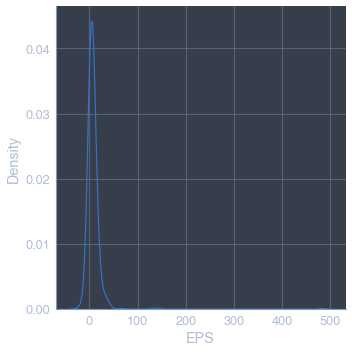

In [16]:
sns.displot(data=data, x='EPS', kind='kde')

In [22]:
data.groupby('Sector').agg({
    'EPS': ['min', 'idxmin', 'mean', 'max', 'idxmax']
})

EPS                                 
                              min idxmin       mean     max idxmax
Sector                                                            
ENERGY & TRANSPORTATION     -2.75    NEM   7.538000  132.82   BKNG
FINANCE                     -5.10    TFC  10.495079   67.74     EG
LIFE SCIENCES              -15.35   MRNA   5.206711   37.82   REGN
MANUFACTURING               -7.47    HAS   6.257849   31.31   DECK
REAL ESTATE & CONSTRUCTION  -0.37    VTR  16.145366  484.14    NVR
TECHNOLOGY                 -22.01   TTWO   6.740758   33.20     DE
TRADE & SERVICES            -6.74    WBA  10.147183  144.44    AZO

In [10]:
data[data['EPS']<0].groupby('Sector').count()

,Name,Exchange,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,BookValue,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Sector,,,,,,,,,,,,,,,,,,,,,
ENERGY & TRANSPORTATION,2,2,2,2,2,2,2,0,2,2,...,2,2,2,2,2,2,2,2,2,2
FINANCE,2,2,2,2,2,2,1,0,2,2,...,2,2,2,2,2,2,2,2,2,2
LIFE SCIENCES,10,10,10,10,10,10,10,0,10,10,...,10,10,10,10,10,10,10,10,10,10
MANUFACTURING,7,7,7,7,7,7,7,0,7,7,...,7,7,7,7,7,7,7,7,7,7
REAL ESTATE & CONSTRUCTION,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
TECHNOLOGY,4,4,4,4,4,4,4,0,4,4,...,4,4,4,4,4,4,4,4,4,4
TRADE & SERVICES,2,2,2,2,2,2,2,0,2,2,...,2,2,2,2,2,2,2,2,2,2


In [15]:
data.sort_values(by='EPS', ascending=False)[clmns].head(10)

,Name,MarketCapitalization,Sector,Industry,BookValue,PERatio,PEGRatio,EPS,Beta,DividendYield
Symbol,,,,,,,,,,
NVR,NVR Inc,2.557458e+10,REAL ESTATE & CONSTRUCTION,OPERATIVE BUILDERS,1337.72,17.09,4.886,484.14,1.168,NaN
AZO,AutoZone Inc,5.025298e+10,TRADE & SERVICES,RETAIL-AUTO & HOME SUPPLY STORES,-282.21,20.37,1.479,144.44,0.712,NaN
BKNG,Booking Holdings Inc,1.291206e+11,ENERGY & TRANSPORTATION,TRANSPORTATION SERVICES,-118.94,28.65,1.009,132.82,1.385,0.0092
EG,Everest Group Ltd,1.668795e+10,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",314.01,5.67,-50.000,67.74,0.627,0.0208
BLK,BlackRock Inc,1.226577e+11,FINANCE,"SECURITY BROKERS, DEALERS & FLOTATION COMPANIES",267.04,20.53,2.458,40.31,1.331,0.0246
ORLY,O’Reilly Automotive Inc,6.416294e+10,TRADE & SERVICES,RETAIL-AUTO & HOME SUPPLY STORES,-27.19,27.85,1.875,39.69,0.924,NaN
REGN,Regeneron Pharmaceuticals Inc,1.180926e+11,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,261.41,28.33,1.604,37.82,0.128,NaN
URI,United Rentals Inc,4.603720e+10,TRADE & SERVICES,"SERVICES-EQUIPMENT RENTAL & LEASING, NEC",125.02,18.42,1.388,37.80,1.706,0.0094
GWW,WW Grainger Inc,4.781550e+10,TRADE & SERVICES,WHOLESALE-DURABLE GOODS,67.04,26.88,2.838,36.43,1.172,0.0084


In [16]:
data.sort_values(by='EPS')[clmns].head(10)

,Name,MarketCapitalization,Sector,Industry,BookValue,PERatio,PEGRatio,EPS,Beta,DividendYield
Symbol,,,,,,,,,,
TTWO,Take-Two Interactive Software Inc,2.432578e+10,TECHNOLOGY,SERVICES-PREPACKAGED SOFTWARE,33.18,NaN,5.570,-22.01,0.835,NaN
MRNA,Moderna Inc,3.328101e+10,LIFE SCIENCES,"BIOLOGICAL PRODUCTS, (NO DISGNOSTIC SUBSTANCES)",30.50,NaN,0.000,-15.35,1.662,NaN
MMM,3M Company,5.808631e+10,LIFE SCIENCES,SURGICAL & MEDICAL INSTRUMENTS & APPARATUS,8.79,NaN,1.905,-12.73,1.001,0.0267
BIO,Bio-Rad Laboratories Inc,8.760474e+09,LIFE SCIENCES,LABORATORY ANALYTICAL INSTRUMENTS,317.32,NaN,1.190,-10.69,0.930,NaN
IFF,International Flavors & Fragrances Inc,2.523889e+10,LIFE SCIENCES,INDUSTRIAL ORGANIC CHEMICALS,55.97,NaN,19.130,-9.78,1.273,0.0161
HAS,Hasbro Inc,8.973863e+09,MANUFACTURING,"GAMES, TOYS & CHILDREN'S VEHICLES (NO DOLLS & ...",8.41,NaN,0.780,-7.47,0.607,0.0434
WBA,Walgreens Boots Alliance Inc,9.219778e+09,TRADE & SERVICES,RETAIL-DRUG STORES AND PROPRIETARY STORES,15.80,NaN,3.553,-6.74,0.702,0.0936
CTLT,Catalent Inc,1.055566e+10,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,19.96,NaN,2.057,-6.48,1.161,NaN
MHK,Mohawk Industries Inc,9.613365e+09,MANUFACTURING,CARPETS & RUGS,121.18,NaN,0.932,-5.64,1.384,NaN


### RevenuePerShareTTM

Revenue per share is a financial ratio that measures a company's revenue generated per outstanding share of its common stock.<br><br>
$\displaystyle
Revenue\ per\ Share = \frac{Total\ revenue}{Number\ of\ shares\ outstanding}
$

In [8]:
data['RevenuePerShareTTM'].describe()

count       483.000000
mean        617.144381
std       11619.210035
min           2.953000
25%          21.135000
50%          37.970000
75%          79.520000
max      255402.660000
Name: RevenuePerShareTTM, dtype: float64

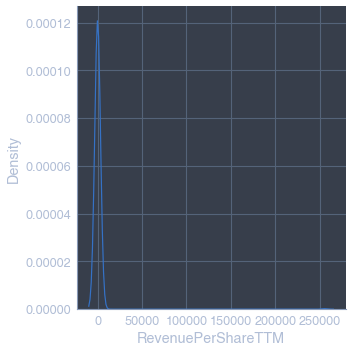

In [8]:
sns.displot(data=data, x='RevenuePerShareTTM', kind='kde')

In [29]:
data.groupby('Sector').agg({
    'RevenuePerShareTTM': ['min', 'idxmin', 'mean', 'max', 'idxmax', 'sum']
})

RevenuePerShareTTM                                 \
                                          min idxmin         mean        max   
Sector                                                                         
ENERGY & TRANSPORTATION                 6.910    KMI    68.305286     623.53   
FINANCE                                 4.631   HBAN  4167.562397  255402.66   
LIFE SCIENCES                           7.320   TECH    51.913506     256.99   
MANUFACTURING                           7.030   MNST    69.616702     391.61   
REAL ESTATE & CONSTRUCTION              2.953    KIM   111.510049    3173.00   
TECHNOLOGY                              5.980    GEN    52.076515     370.45   
TRADE & SERVICES                        4.343   CPRT   169.342542    2319.45   

                                               
                           idxmax         sum  
Sector                                         
ENERGY & TRANSPORTATION      BKNG    4781.370  
FINANCE                     BRK-B  262556.431  
LIFE SCIENCES                 HCA    3997.340  
MANUFACTURING                  BG    6543.970  
REAL ESTATE & CONSTRUCTION    NVR    4571.912  
TECHNOLOGY                   CHTR    3437.050  
TRADE & SERVICES              MCK   12192.663

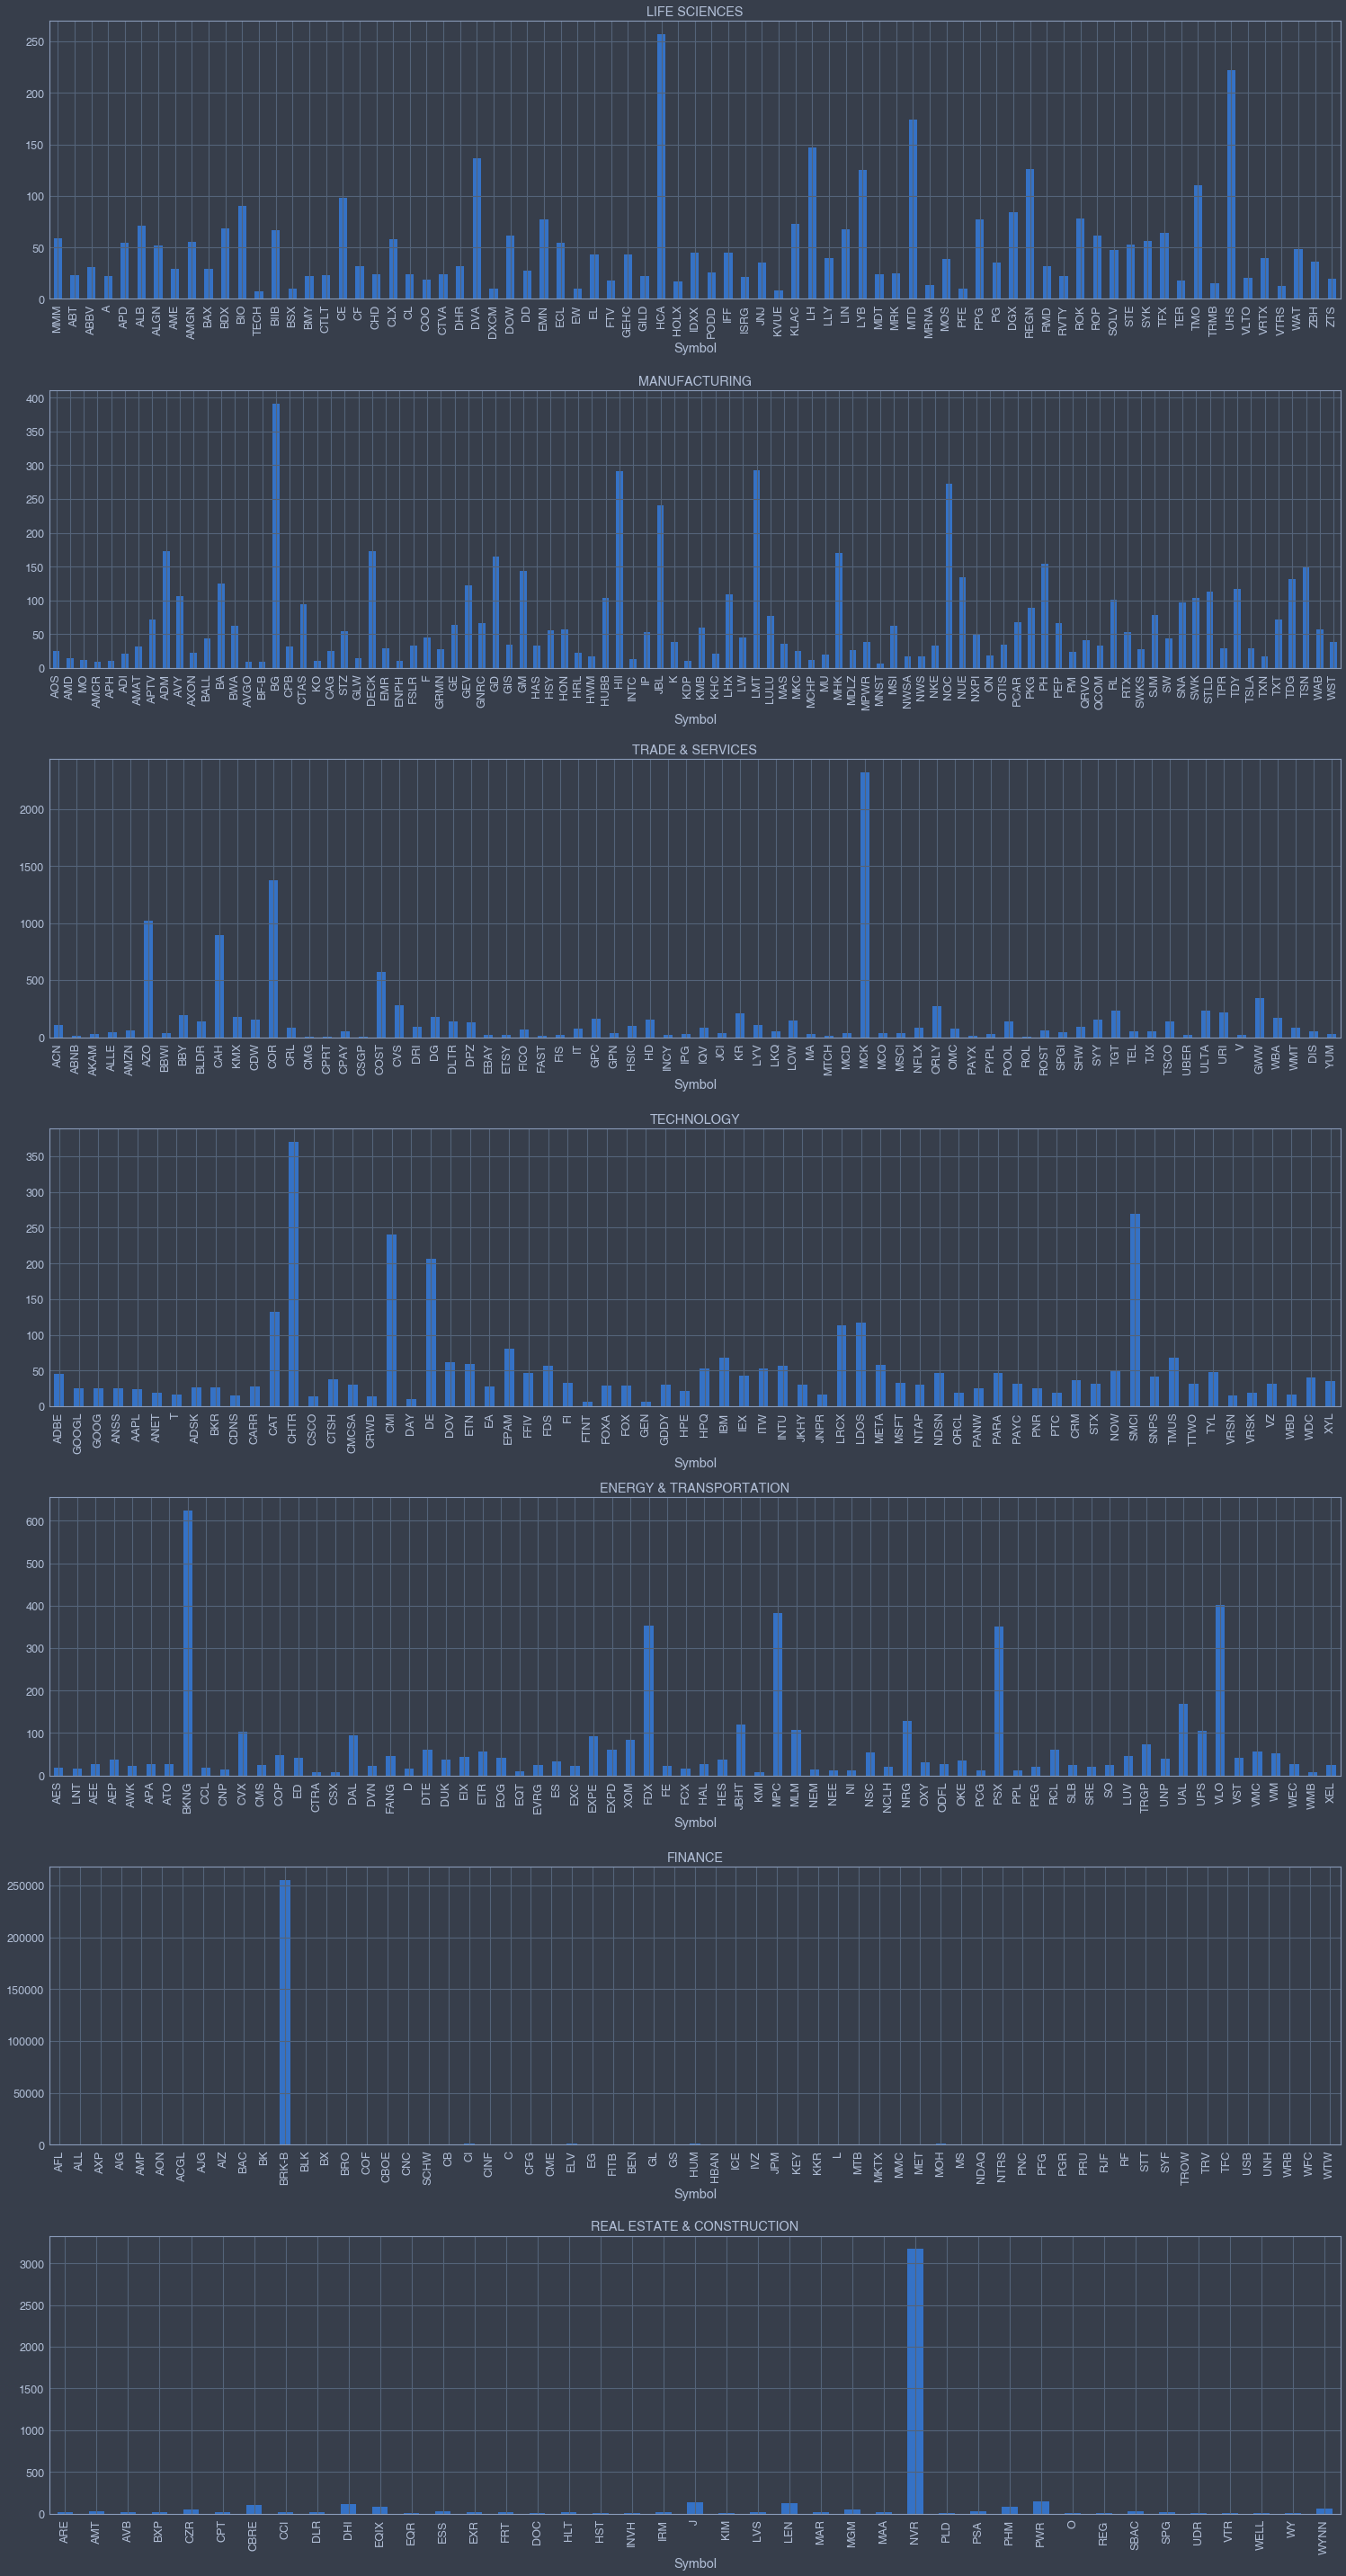

In [60]:
fig, ax = plt.subplots(7, 1, figsize=(21, 40))

for i, sector in enumerate(data['Sector'].unique()):
    if sector is not np.nan:
        data[data['Sector']==sector]['RevenuePerShareTTM'].plot(kind='bar', ax=ax[i])
        ax[i].set_title(sector)
fig.tight_layout()

In [39]:
rev_per_share = data['RevenuePerShareTTM']
bins = pd.qcut(rev_per_share, 4)
results = (pd.Series(rev_per_share).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,RevenuePerShareTTM,count,min,max
0,"(2.952, 21.245]",126,2.953,21.22
1,"(21.245, 38.98]",126,21.270,38.98
2,"(38.98, 79.52]",125,39.010,78.91
3,"(79.52, 255402.66]",126,80.130,255402.66


In [10]:
cat['rev_per_share_bins'] = bins
df = cat.groupby(['Sector', 'rev_per_share_bins']).count()['Name'].to_frame()
df

Name
Sector                     rev_per_share_bins      
ENERGY & TRANSPORTATION    (2.952, 21.135]       17
                           (21.135, 37.97]       23
                           (37.97, 79.52]        16
                           (79.52, 255402.66]    14
FINANCE                    (2.952, 21.135]       17
                           (21.135, 37.97]       11
                           (37.97, 79.52]        15
                           (79.52, 255402.66]    20
LIFE SCIENCES              (2.952, 21.135]       15
                           (21.135, 37.97]       23
                           (37.97, 79.52]        28
                           (79.52, 255402.66]    11
MANUFACTURING              (2.952, 21.135]       20
                           (21.135, 37.97]       23
                           (37.97, 79.52]        25
                           (79.52, 255402.66]    26
REAL ESTATE & CONSTRUCTION (2.952, 21.135]       25
                           (21.135, 37.97]        5
                           (37.97, 79.52]         4
                           (79.52, 255402.66]     7
TECHNOLOGY                 (2.952, 21.135]       14
                           (21.135, 37.97]       25
                           (37.97, 79.52]        19
                           (79.52, 255402.66]     8
TRADE & SERVICES           (2.952, 21.135]       13
                           (21.135, 37.97]       11
                           (37.97, 79.52]        13
                           (79.52, 255402.66]    35

In [14]:
betas = data[data['RevenuePerShareTTM']>data['RevenuePerShareTTM'].quantile(0.75)]['Beta']
bins = pd.qcut(betas, 4)
results = (pd.Series(betas).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,Beta,count,min,max
0,"(0.127, 0.728]",30,0.128,0.722
1,"(0.728, 1.034]",30,0.730,1.033
2,"(1.034, 1.334]",30,1.034,1.331
3,"(1.334, 2.039]",30,1.343,2.039


In [15]:
cat['rev_per_share & betas bins'] = bins
df = cat.groupby(['Sector', 'rev_per_share & betas bins']).count()['Name'].to_frame()
df

Name
Sector                     rev_per_share & betas bins      
ENERGY & TRANSPORTATION    (0.127, 0.728]                 0
                           (0.728, 1.034]                 3
                           (1.034, 1.334]                 5
                           (1.334, 2.039]                 6
FINANCE                    (0.127, 0.728]                11
                           (0.728, 1.034]                 3
                           (1.034, 1.334]                 4
                           (1.334, 2.039]                 2
LIFE SCIENCES              (0.127, 0.728]                 1
                           (0.728, 1.034]                 5
                           (1.034, 1.334]                 4
                           (1.334, 2.039]                 1
MANUFACTURING              (0.127, 0.728]                 6
                           (0.728, 1.034]                 7
                           (1.034, 1.334]                 4
                           (1.334, 2.039]                 8
REAL ESTATE & CONSTRUCTION (0.127, 0.728]                 2
                           (0.728, 1.034]                 1
                           (1.034, 1.334]                 1
                           (1.334, 2.039]                 3
TECHNOLOGY                 (0.127, 0.728]                 1
                           (0.728, 1.034]                 2
                           (1.034, 1.334]                 3
                           (1.334, 2.039]                 2
TRADE & SERVICES           (0.127, 0.728]                 9
                           (0.728, 1.034]                 9
                           (1.034, 1.334]                 9
                           (1.334, 2.039]                 8

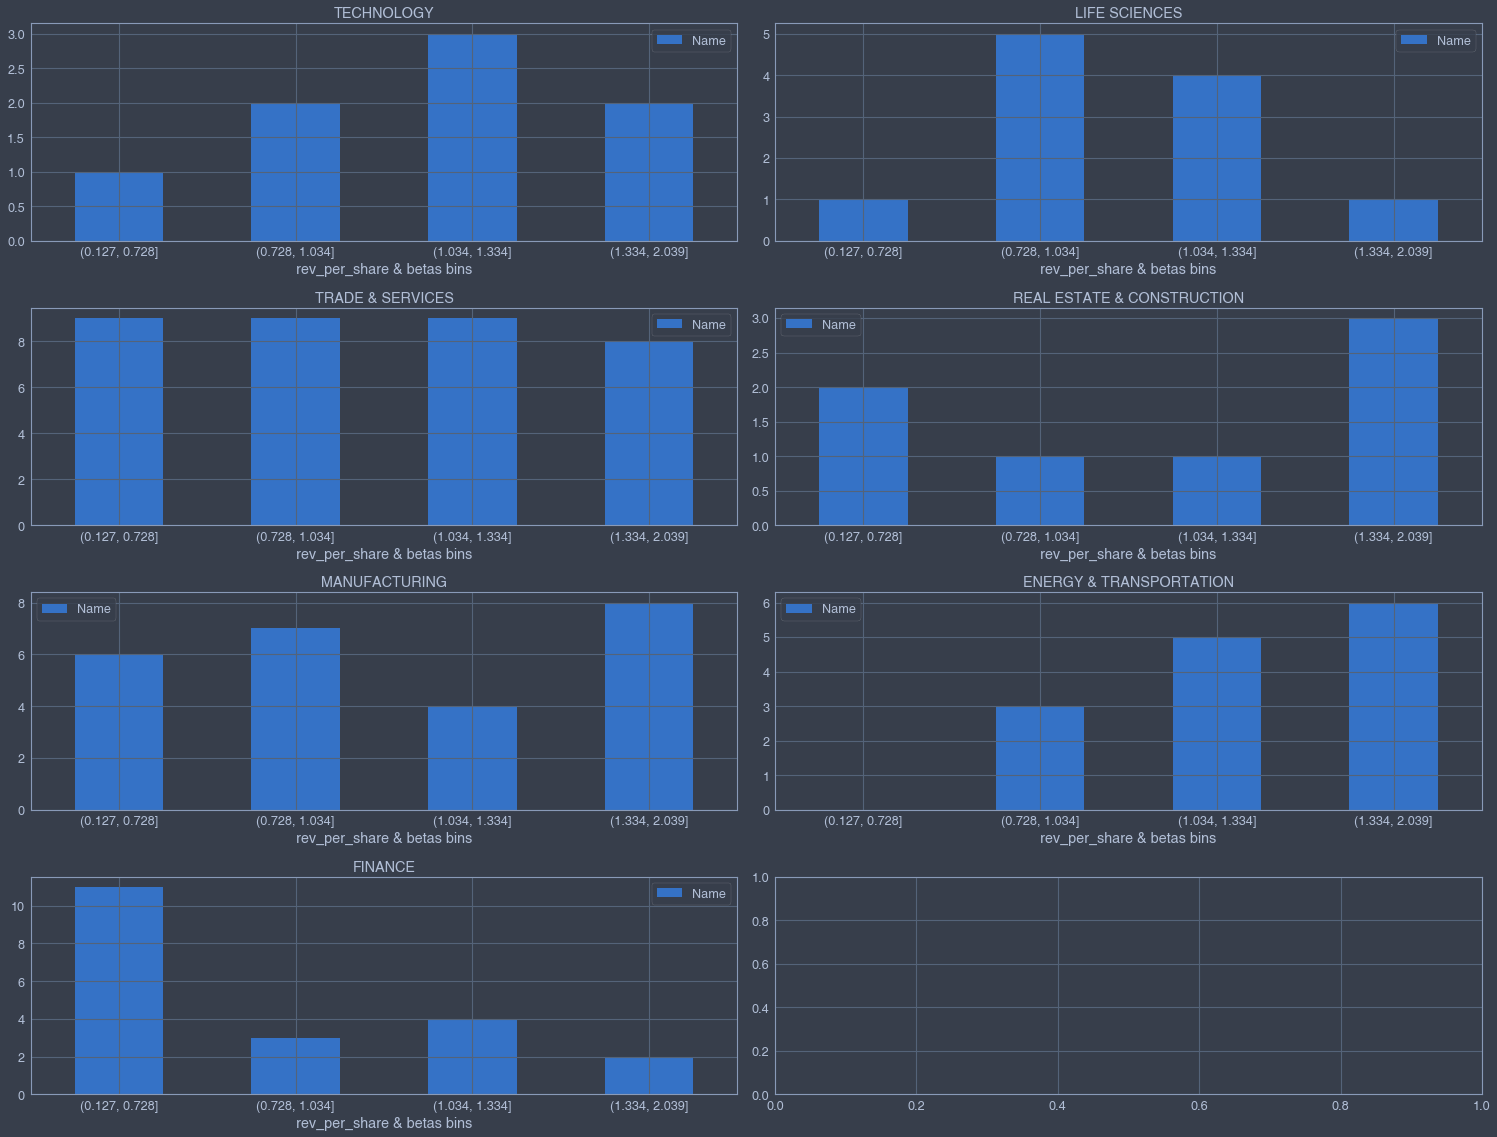

In [47]:
axs = [(x, y) for x in range(4) for y in range(2)]
fig, ax = plt.subplots(4, 2, figsize=(21, 16))

for sector, a in zip(set(df.index.get_level_values(0)), axs[:-1]):
        df.loc[sector].plot(kind='bar', ax=ax[a[0], a[1]])
        ax[a[0], a[1]].set_title(sector)
        ax[a[0], a[1]].tick_params(axis='x', rotation=0)
        
fig.tight_layout()

### ProfitMargin

Profit margin is a common measure of the degree to which a company or a particular business activity makes money. Expressed as a percentage, it represents the portion of a company’s sales revenue that it gets to keep as a profit, after subtracting all of its costs.<br><br>
$\displaystyle
Profit\ Margin = \frac{100*Profit}{Revenue}
$

In [8]:
data['ProfitMargin'].describe()

count    483.000000
mean       0.135342
std        0.138943
min       -1.162000
25%        0.066250
50%        0.131000
75%        0.198500
max        0.650000
Name: ProfitMargin, dtype: float64

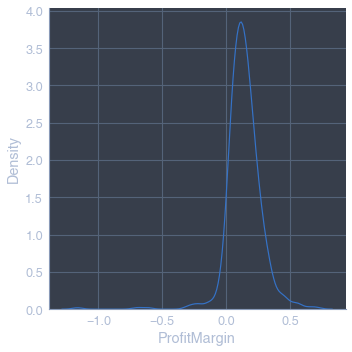

In [9]:
sns.displot(data=data, x='ProfitMargin', kind='kde')

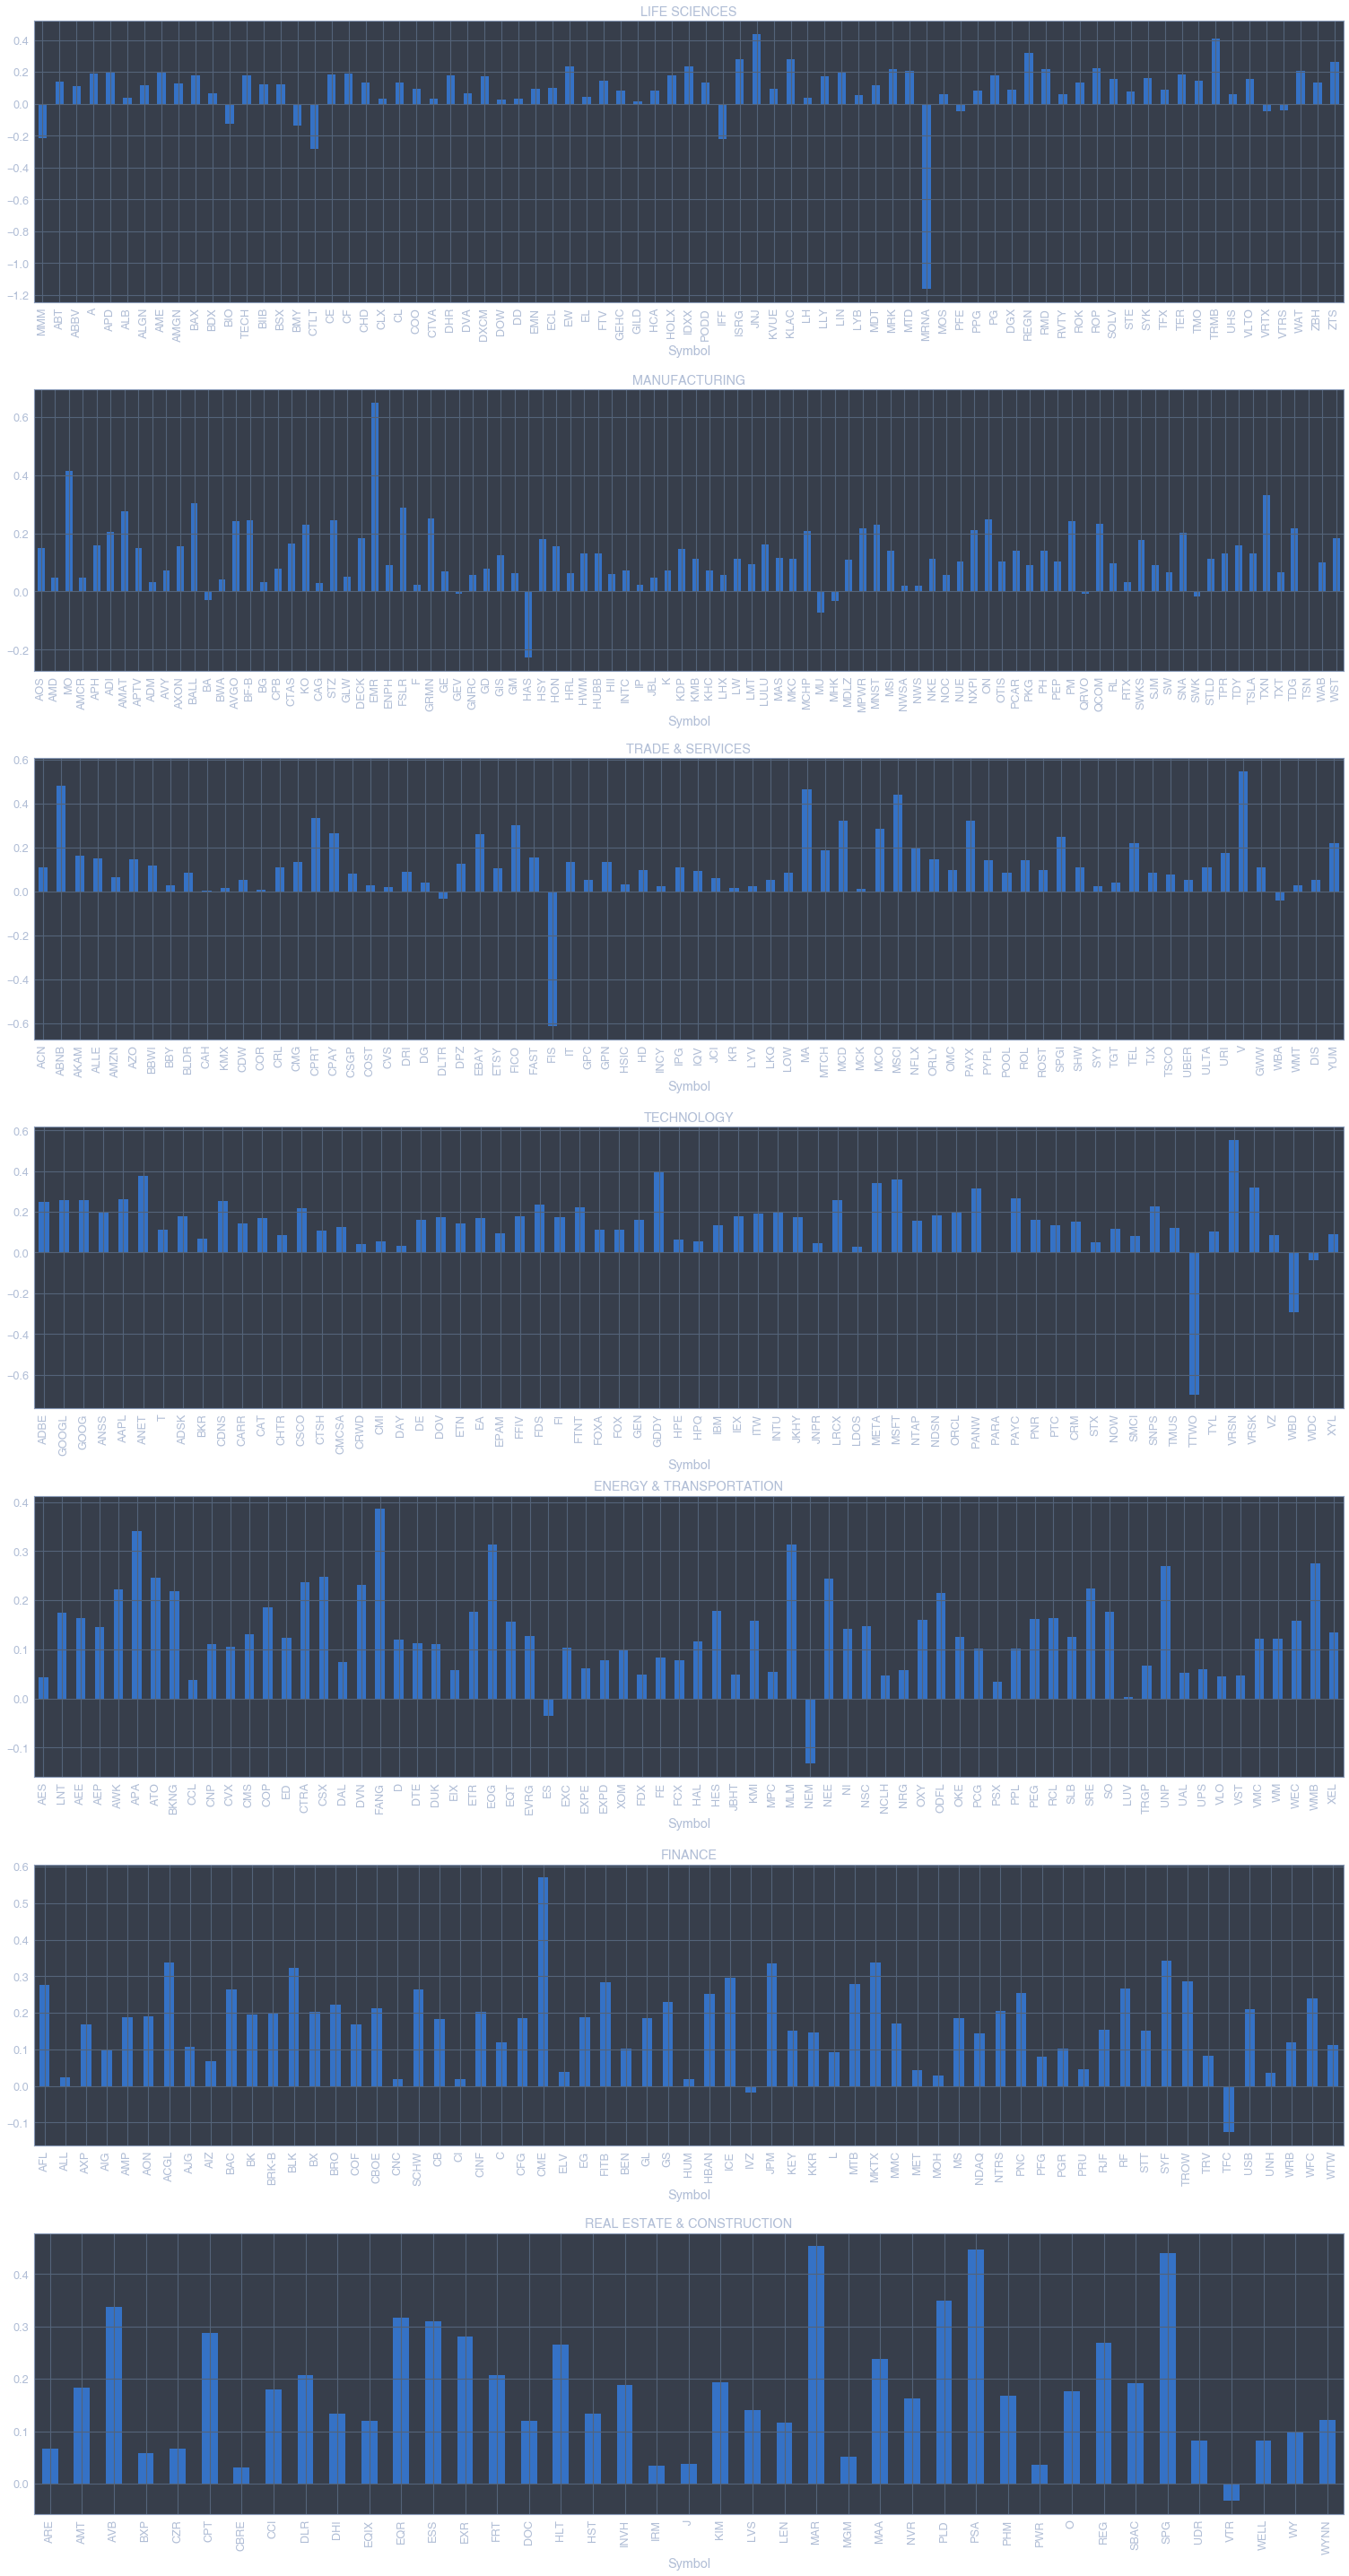

In [11]:
fig, ax = plt.subplots(7, 1, figsize=(21, 40))

for i, sector in enumerate(data['Sector'].unique()):
    if sector is not np.nan:
        data[data['Sector']==sector]['ProfitMargin'].plot(kind='bar', ax=ax[i])
        ax[i].set_title(sector)
fig.tight_layout()

In [40]:
profit_margin = data['ProfitMargin']
bins = pd.cut(profit_margin, 8)
results = (pd.Series(profit_margin).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,ProfitMargin,count,min,max
0,"(-1.164, -0.929]",1,-1.1620,-1.1620
1,"(-0.929, -0.696]",1,-0.7000,-0.7000
2,"(-0.696, -0.462]",1,-0.6140,-0.6140
3,"(-0.462, -0.229]",2,-0.2950,-0.2840
4,"(-0.229, 0.00425]",27,-0.2280,0.0029
5,"(0.00425, 0.238]",385,0.0067,0.2370
6,"(0.238, 0.471]",79,0.2380,0.4650
7,"(0.471, 0.704]",7,0.4820,0.7040


In [41]:
cat['profit_margin_bins'] = bins
cat.groupby(['Sector', 'profit_margin_bins']).count()['Name'].to_frame()

Name
Sector                     profit_margin_bins      
ENERGY & TRANSPORTATION    (-1.164, -0.929]       0
                           (-0.929, -0.696]       0
                           (-0.696, -0.462]       0
                           (-0.462, -0.229]       0
                           (-0.229, 0.00425]      4
                           (0.00425, 0.238]      63
                           (0.238, 0.471]         9
                           (0.471, 0.704]         0
FINANCE                    (-1.164, -0.929]       0
                           (-0.929, -0.696]       0
                           (-0.696, -0.462]       0
                           (-0.462, -0.229]       0
                           (-0.229, 0.00425]      2
                           (0.00425, 0.238]      45
                           (0.238, 0.471]        17
                           (0.471, 0.704]         1
LIFE SCIENCES              (-1.164, -0.929]       1
                           (-0.929, -0.696]       0
                           (-0.696, -0.462]       0
                           (-0.462, -0.229]       1
                           (-0.229, 0.00425]      7
                           (0.00425, 0.238]      64
                           (0.238, 0.471]         7
                           (0.471, 0.704]         0
MANUFACTURING              (-1.164, -0.929]       0
                           (-0.929, -0.696]       0
                           (-0.696, -0.462]       0
                           (-0.462, -0.229]       0
                           (-0.229, 0.00425]      8
                           (0.00425, 0.238]      75
                           (0.238, 0.471]        11
                           (0.471, 0.704]         2
REAL ESTATE & CONSTRUCTION (-1.164, -0.929]       0
                           (-0.929, -0.696]       0
                           (-0.696, -0.462]       0
                           (-0.462, -0.229]       0
                           (-0.229, 0.00425]      1
                           (0.00425, 0.238]      28
                           (0.238, 0.471]        12
                           (0.471, 0.704]         1
TECHNOLOGY                 (-1.164, -0.929]       0
                           (-0.929, -0.696]       1
                           (-0.696, -0.462]       0
                           (-0.462, -0.229]       1
                           (-0.229, 0.00425]      2
                           (0.00425, 0.238]      51
                           (0.238, 0.471]        13
                           (0.471, 0.704]         1
TRADE & SERVICES           (-1.164, -0.929]       0
                           (-0.929, -0.696]       0
                           (-0.696, -0.462]       1
                           (-0.462, -0.229]       0
                           (-0.229, 0.00425]      3
                           (0.00425, 0.238]      59
                           (0.238, 0.471]        10
                           (0.471, 0.704]         2

In [31]:
data[data['ProfitMargin']<0].groupby('Sector').count().sort_values(by='Name', ascending=False)

,Name,Exchange,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,BookValue,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Sector,,,,,,,,,,,,,,,,,,,,,
REAL ESTATE & CONSTRUCTION,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
ENERGY & TRANSPORTATION,2,2,2,2,2,2,2,0,2,2,...,2,2,2,2,2,2,2,2,2,2
FINANCE,2,2,2,2,2,2,1,0,2,2,...,2,2,2,2,2,2,2,2,2,2
TRADE & SERVICES,3,3,3,3,3,3,3,1,3,3,...,3,3,3,3,3,3,3,3,3,3
TECHNOLOGY,4,4,4,4,4,4,4,0,4,4,...,4,4,4,4,4,4,4,4,4,4
MANUFACTURING,8,8,8,8,8,8,8,0,7,7,...,8,8,7,8,8,8,8,8,8,8
LIFE SCIENCES,9,9,9,9,9,9,9,0,9,9,...,9,9,9,9,9,9,9,9,9,9


In [32]:
data[data['ProfitMargin']>0.2].groupby('Sector').count().sort_values(by='Name')

,Name,Exchange,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,BookValue,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Sector,,,,,,,,,,,,,,,,,,,,,
LIFE SCIENCES,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
REAL ESTATE & CONSTRUCTION,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
TRADE & SERVICES,14,14,14,14,14,14,14,13,14,13,...,14,14,14,14,14,14,14,14,14,14
ENERGY & TRANSPORTATION,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
TECHNOLOGY,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
MANUFACTURING,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
FINANCE,24,24,24,24,24,24,10,24,24,24,...,24,24,24,24,24,24,24,24,24,24


In [35]:
data.sort_values(by='ProfitMargin').head(10)

,Name,Exchange,Sector,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
MRNA,Moderna Inc,NASDAQ,LIFE SCIENCES,"BIOLOGICAL PRODUCTS, (NO DISGNOSTIC SUBSTANCES)",December,2024-06-30,3.328101e+10,-4.107000e+09,NaN,0.000,...,5.22,4.641,1.662,170.47,62.55,131.38,105.61,3.843960e+08,None,None
TTWO,Take-Two Interactive Software Inc,NASDAQ,TECHNOLOGY,SERVICES-PREPACKAGED SOFTWARE,March,2024-03-31,2.432578e+10,5.075000e+08,NaN,5.570,...,5.06,49.45,0.835,171.59,130.34,153.91,152.39,1.752830e+08,None,None
FIS,Fidelity National Information Services Inc,NYSE,TRADE & SERVICES,"SERVICES-BUSINESS SERVICES, NEC",December,2024-03-31,4.211933e+10,3.395000e+09,105.17,6.010,...,6.09,14.76,1.069,78.36,46.04,75.96,66.12,5.562510e+08,2024-06-24,2024-06-10
WBD,Warner Bros Discovery Inc,NASDAQ,TECHNOLOGY,CABLE & OTHER PAY TELEVISION SERVICES,December,2024-06-30,1.722467e+10,7.338000e+09,NaN,2.786,...,1.367,4.486,1.497,13.81,6.73,7.78,9.16,2.451910e+09,None,None
CTLT,Catalent Inc,NYSE,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,June,2024-03-31,1.055566e+10,3.550000e+08,NaN,2.057,...,3.651,-19.84,1.161,60.20,31.80,56.09,50.85,1.809800e+08,None,None
HAS,Hasbro Inc,NASDAQ,MANUFACTURING,"GAMES, TOYS & CHILDREN'S VEHICLES (NO DOLLS & ...",December,2024-03-31,8.973863e+09,7.745000e+08,NaN,0.780,...,2.142,-12.42,0.607,70.66,41.61,59.83,54.00,1.392160e+08,2024-09-04,2024-08-21
IFF,International Flavors & Fragrances Inc,NYSE,LIFE SCIENCES,INDUSTRIAL ORGANIC CHEMICALS,December,2024-03-31,2.523889e+10,1.775000e+09,NaN,19.130,...,2.739,-31.57,1.273,101.89,60.24,96.67,84.10,2.553510e+08,2024-07-10,2024-09-20
MMM,3M Company,NYSE,LIFE SCIENCES,SURGICAL & MEDICAL INSTRUMENTS & APPARATUS,December,2024-03-31,5.808631e+10,8.146000e+09,NaN,1.905,...,1.879,-9.08,1.001,105.52,68.63,101.50,98.13,5.533610e+08,2024-06-12,2024-05-23
BMY,Bristol-Myers Squibb Company,NYSE,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,December,2024-03-31,9.053028e+10,1.817200e+10,NaN,31.350,...,2.862,24.5,0.439,60.42,39.04,41.85,48.61,2.027100e+09,2024-08-01,2024-07-05


### OperatingMarginTTM

The operating margin measures how much profit a company makes on a dollar of sales after paying for variable costs of production, such as wages and raw materials, but before paying interest or tax.

$\displaystyle
Operating\ Margin=\frac{Operating\ Earnings}{Revenue}
$

In [8]:
data['OperatingMarginTTM'].describe()

count    483.000000
mean       0.194956
std        0.313142
min       -5.660000
25%        0.115500
50%        0.189000
75%        0.280000
max        2.352000
Name: OperatingMarginTTM, dtype: float64

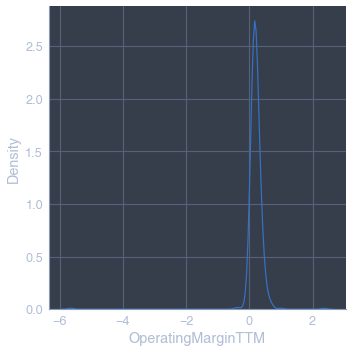

In [9]:
sns.displot(data=data, x='OperatingMarginTTM', kind='kde')

In [43]:
op_margin = data['OperatingMarginTTM']
bins = pd.qcut(op_margin, 8)
results = (pd.Series(op_margin).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,OperatingMarginTTM,count,min,max
0,"(-5.6610000000000005, 0.0702]",63,-5.6600,0.070
1,"(0.0702, 0.12]",63,0.0702,0.119
2,"(0.12, 0.156]",66,0.1200,0.156
3,"(0.156, 0.19]",61,0.1570,0.190
4,"(0.19, 0.22]",63,0.1920,0.220
5,"(0.22, 0.279]",61,0.2210,0.278
6,"(0.279, 0.352]",63,0.2800,0.351
7,"(0.352, 2.352]",63,0.3530,2.352


In [10]:
cat['op_margin_bins'] = bins
cat.groupby(['Sector', 'op_margin_bins']).count()['Name'].to_frame()

Name
Sector                     op_margin_bins                     
ENERGY & TRANSPORTATION    (-5.6610000000000005, 0.0695]     6
                           (0.0695, 0.116]                   6
                           (0.116, 0.154]                    8
                           (0.154, 0.189]                    9
                           (0.189, 0.22]                     9
                           (0.22, 0.28]                     15
                           (0.28, 0.351]                    11
                           (0.351, 2.352]                    6
FINANCE                    (-5.6610000000000005, 0.0695]     6
                           (0.0695, 0.116]                   7
                           (0.116, 0.154]                    5
                           (0.154, 0.189]                    4
                           (0.189, 0.22]                     4
                           (0.22, 0.28]                      7
                           (0.28, 0.351]                    13
                           (0.351, 2.352]                   17
LIFE SCIENCES              (-5.6610000000000005, 0.0695]     5
                           (0.0695, 0.116]                   9
                           (0.116, 0.154]                   12
                           (0.154, 0.189]                   14
                           (0.189, 0.22]                    12
                           (0.22, 0.28]                     11
                           (0.28, 0.351]                    10
                           (0.351, 2.352]                    4
MANUFACTURING              (-5.6610000000000005, 0.0695]    17
                           (0.0695, 0.116]                  17
                           (0.116, 0.154]                   12
                           (0.154, 0.189]                   13
                           (0.189, 0.22]                    12
                           (0.22, 0.28]                     10
                           (0.28, 0.351]                     9
                           (0.351, 2.352]                    4
REAL ESTATE & CONSTRUCTION (-5.6610000000000005, 0.0695]     3
                           (0.0695, 0.116]                   1
                           (0.116, 0.154]                    5
                           (0.154, 0.189]                    7
                           (0.189, 0.22]                     4
                           (0.22, 0.28]                      1
                           (0.28, 0.351]                    10
                           (0.351, 2.352]                   10
TECHNOLOGY                 (-5.6610000000000005, 0.0695]     5
                           (0.0695, 0.116]                  12
                           (0.116, 0.154]                    5
                           (0.154, 0.189]                    7
                           (0.189, 0.22]                    10
                           (0.22, 0.28]                     14
                           (0.28, 0.351]                     5
                           (0.351, 2.352]                    8
TRADE & SERVICES           (-5.6610000000000005, 0.0695]    19
                           (0.0695, 0.116]                   8
                           (0.116, 0.154]                   14
                           (0.154, 0.189]                    7
                           (0.189, 0.22]                     9
                           (0.22, 0.28]                      4
                           (0.28, 0.351]                     0
                           (0.351, 2.352]                   11

In [48]:
data[data['OperatingMarginTTM']<0][['OperatingMarginTTM', 'Sector']]

,OperatingMarginTTM,Sector
Symbol,,
ALB,-0.1060,LIFE SCIENCES
CSGP,-0.0238,TRADE & SERVICES
EQT,-0.3300,ENERGY & TRANSPORTATION
EXPE,-0.0145,ENERGY & TRANSPORTATION
GEV,-0.0017,MANUFACTURING
INCY,-0.4250,TRADE & SERVICES
INTC,-0.0567,MANUFACTURING
MRNA,-5.6600,LIFE SCIENCES
TTWO,-0.0405,TECHNOLOGY


### ReturnOnAssetsTTM

Return on assets (ROA) is a financial ratio that indicates how profitable a company is relative to its total assets. It's commonly expressed as a percentage using a company's net income and average assets.

$\displaystyle
ROA=\frac{Net\ Income}{Average\ Total\ Assets}
$

In [39]:
data['ReturnOnAssetsTTM'].describe()

count    503.000000
mean       0.066536
std        0.055289
min       -0.154000
25%        0.029500
50%        0.053100
75%        0.087050
max        0.491000
Name: ReturnOnAssetsTTM, dtype: float64

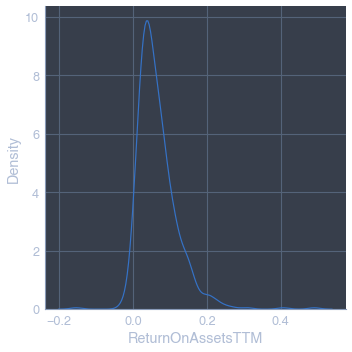

In [10]:
sns.displot(data=data, x='ReturnOnAssetsTTM', kind='kde')

In [47]:
data[data['ReturnOnAssetsTTM']<0][['ReturnOnAssetsTTM', 'Sector']]

,ReturnOnAssetsTTM,Sector
Symbol,,
ALB,-0.0268,LIFE SCIENCES
CTLT,-0.0071,LIFE SCIENCES
MU,-0.0157,MANUFACTURING
MRNA,-0.1540,LIFE SCIENCES
TTWO,-0.0209,TECHNOLOGY
TFC,-0.0119,FINANCE
WBD,-0.0016,TECHNOLOGY


In [32]:
roa = data['ReturnOnAssetsTTM']
bins = pd.cut(roa, 8)
results = (pd.Series(roa).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,ReturnOnAssetsTTM,count,min,max
0,"(-0.155, -0.0734]",1,-0.1540,-0.1540
1,"(-0.0734, 0.00725]",22,-0.0268,0.0070
2,"(0.00725, 0.0879]",355,0.0077,0.0871
3,"(0.0879, 0.168]",104,0.0879,0.1680
4,"(0.168, 0.249]",16,0.1700,0.2360
5,"(0.249, 0.33]",3,0.2500,0.3090
6,"(0.33, 0.41]",1,0.4070,0.4070
7,"(0.41, 0.491]",1,0.4910,0.4910


In [33]:
cat['roa_bins'] = bins
cat.groupby(['Sector', 'roa_bins']).count()['Name'].to_frame()

Name
Sector                     roa_bins                
ENERGY & TRANSPORTATION    (-0.155, -0.0734]      0
                           (-0.0734, 0.00725]     1
                           (0.00725, 0.0879]     64
                           (0.0879, 0.168]       10
                           (0.168, 0.249]         1
                           (0.249, 0.33]          0
                           (0.33, 0.41]           0
                           (0.41, 0.491]          0
FINANCE                    (-0.155, -0.0734]      0
                           (-0.0734, 0.00725]     9
                           (0.00725, 0.0879]     54
                           (0.0879, 0.168]        2
                           (0.168, 0.249]         0
                           (0.249, 0.33]          0
                           (0.33, 0.41]           0
                           (0.41, 0.491]          0
LIFE SCIENCES              (-0.155, -0.0734]      1
                           (-0.0734, 0.00725]     2
                           (0.00725, 0.0879]     59
                           (0.0879, 0.168]       16
                           (0.168, 0.249]         2
                           (0.249, 0.33]          0
                           (0.33, 0.41]           0
                           (0.41, 0.491]          0
MANUFACTURING              (-0.155, -0.0734]      0
                           (-0.0734, 0.00725]     5
                           (0.00725, 0.0879]     59
                           (0.0879, 0.168]       28
                           (0.168, 0.249]         3
                           (0.249, 0.33]          0
                           (0.33, 0.41]           0
                           (0.41, 0.491]          1
REAL ESTATE & CONSTRUCTION (-0.155, -0.0734]      0
                           (-0.0734, 0.00725]     0
                           (0.00725, 0.0879]     36
                           (0.0879, 0.168]        5
                           (0.168, 0.249]         1
                           (0.249, 0.33]          0
                           (0.33, 0.41]           0
                           (0.41, 0.491]          0
TECHNOLOGY                 (-0.155, -0.0734]      0
                           (-0.0734, 0.00725]     4
                           (0.00725, 0.0879]     44
                           (0.0879, 0.168]       17
                           (0.168, 0.249]         3
                           (0.249, 0.33]          0
                           (0.33, 0.41]           1
                           (0.41, 0.491]          0
TRADE & SERVICES           (-0.155, -0.0734]      0
                           (-0.0734, 0.00725]     1
                           (0.00725, 0.0879]     39
                           (0.0879, 0.168]       26
                           (0.168, 0.249]         6
                           (0.249, 0.33]          3
                           (0.33, 0.41]           0
                           (0.41, 0.491]          0

## ReturnOnEquityTTM

Return on equity (ROE) is a measure of a company's financial performance. It is calculated by dividing net income by shareholders' equity. Because shareholders' equity is equal to a company’s assets minus its debt, ROE is a way of showing a company's return on net assets.<br><br>
$\displaystyle
ROE=\frac{Net\ Income}{Shareholders'\ Equity}
$

In [8]:
data['ReturnOnEquityTTM'].describe()

count    503.000000
mean       0.198630
std        0.700636
min      -12.240000
25%        0.085050
50%        0.158000
75%        0.293000
max        2.515000
Name: ReturnOnEquityTTM, dtype: float64

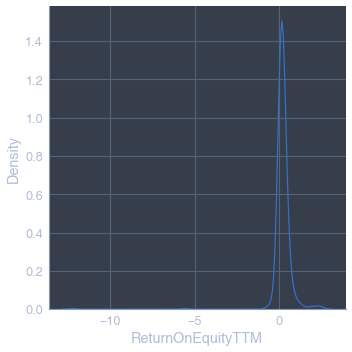

In [11]:
sns.displot(data=data, x='ReturnOnEquityTTM', kind='kde')

In [27]:
data[data['ReturnOnEquityTTM']<0][['ReturnOnEquityTTM', 'Sector']]

,ReturnOnEquityTTM,Sector
Symbol,,
MMM,-0.6930,LIFE SCIENCES
AES,-0.0148,ENERGY & TRANSPORTATION
BAX,-0.0042,LIFE SCIENCES
BIO,-0.0343,LIFE SCIENCES
BMY,-0.2530,LIFE SCIENCES
CTLT,-0.2830,LIFE SCIENCES
DLTR,-0.1230,TRADE & SERVICES
ETSY,-12.2400,TRADE & SERVICES
ES,-0.0264,ENERGY & TRANSPORTATION


In [29]:
roa = data['ReturnOnAssetsTTM']
bins = pd.cut(roa, 8)
results = (pd.Series(roa).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,ReturnOnAssetsTTM,count,min,max
0,"(-0.155, -0.0734]",1,-0.1540,-0.1540
1,"(-0.0734, 0.00725]",22,-0.0268,0.0070
2,"(0.00725, 0.0879]",355,0.0077,0.0871
3,"(0.0879, 0.168]",104,0.0879,0.1680
4,"(0.168, 0.249]",16,0.1700,0.2360
5,"(0.249, 0.33]",3,0.2500,0.3090
6,"(0.33, 0.41]",1,0.4070,0.4070
7,"(0.41, 0.491]",1,0.4910,0.4910


In [31]:
cat['roe_bins'] = bins
cat.groupby(['Sector', 'roe_bins']).count()['Name'].to_frame()

Name
Sector                     roe_bins                
ENERGY & TRANSPORTATION    (-0.155, -0.0734]      0
                           (-0.0734, 0.00725]     1
                           (0.00725, 0.0879]     64
                           (0.0879, 0.168]       10
                           (0.168, 0.249]         1
                           (0.249, 0.33]          0
                           (0.33, 0.41]           0
                           (0.41, 0.491]          0
FINANCE                    (-0.155, -0.0734]      0
                           (-0.0734, 0.00725]     9
                           (0.00725, 0.0879]     54
                           (0.0879, 0.168]        2
                           (0.168, 0.249]         0
                           (0.249, 0.33]          0
                           (0.33, 0.41]           0
                           (0.41, 0.491]          0
LIFE SCIENCES              (-0.155, -0.0734]      1
                           (-0.0734, 0.00725]     2
                           (0.00725, 0.0879]     59
                           (0.0879, 0.168]       16
                           (0.168, 0.249]         2
                           (0.249, 0.33]          0
                           (0.33, 0.41]           0
                           (0.41, 0.491]          0
MANUFACTURING              (-0.155, -0.0734]      0
                           (-0.0734, 0.00725]     5
                           (0.00725, 0.0879]     59
                           (0.0879, 0.168]       28
                           (0.168, 0.249]         3
                           (0.249, 0.33]          0
                           (0.33, 0.41]           0
                           (0.41, 0.491]          1
REAL ESTATE & CONSTRUCTION (-0.155, -0.0734]      0
                           (-0.0734, 0.00725]     0
                           (0.00725, 0.0879]     36
                           (0.0879, 0.168]        5
                           (0.168, 0.249]         1
                           (0.249, 0.33]          0
                           (0.33, 0.41]           0
                           (0.41, 0.491]          0
TECHNOLOGY                 (-0.155, -0.0734]      0
                           (-0.0734, 0.00725]     4
                           (0.00725, 0.0879]     44
                           (0.0879, 0.168]       17
                           (0.168, 0.249]         3
                           (0.249, 0.33]          0
                           (0.33, 0.41]           1
                           (0.41, 0.491]          0
TRADE & SERVICES           (-0.155, -0.0734]      0
                           (-0.0734, 0.00725]     1
                           (0.00725, 0.0879]     39
                           (0.0879, 0.168]       26
                           (0.168, 0.249]         6
                           (0.249, 0.33]          3
                           (0.33, 0.41]           0
                           (0.41, 0.491]          0

<AxesSubplot:xlabel='Sector'>

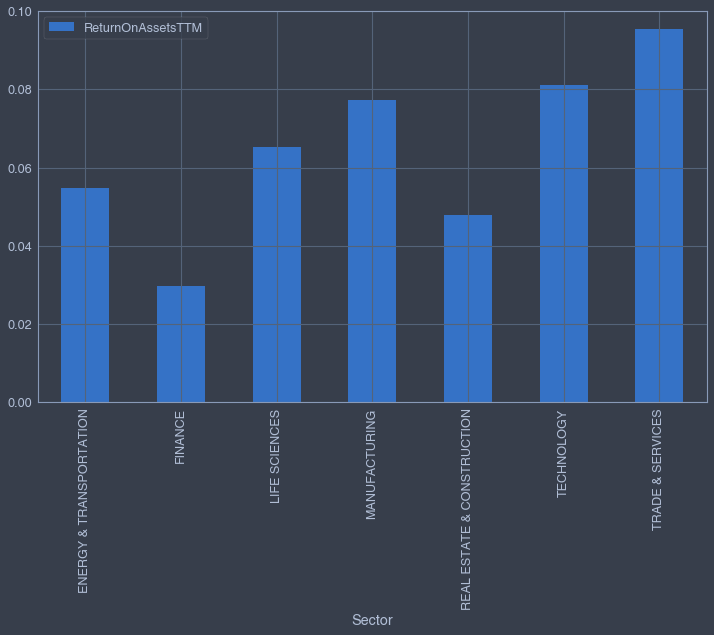

In [27]:
data.groupby('Sector').agg({'ReturnOnAssetsTTM': 'mean'}).plot(kind='bar')

## RevenueTTM

The basic revenue definition is the total amount of money brought in by a company’s operations, measured over a set amount of time. A business’s revenue is its gross income before subtracting any expenses. Profits and total earnings define revenue—it is the financial gain through sales and/or services rendered.<br><br>
$\displaystyle
Net\ Revenue = (Quantity\ Sold * Unit\ Price) - Discounts - Allowances - Returns
$

In [9]:
data['RevenueTTM'].describe()

count    5.030000e+02
mean     3.336362e+10
std      6.669602e+10
min      7.596960e+08
25%      6.487900e+09
50%      1.298000e+10
75%      2.757089e+10
max      6.573320e+11
Name: RevenueTTM, dtype: float64

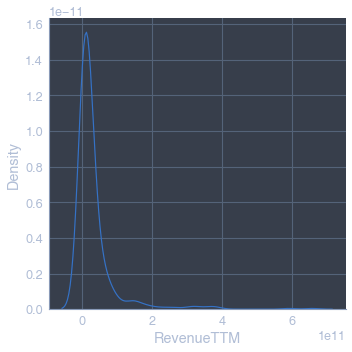

In [10]:
sns.displot(data=data, x='RevenueTTM', kind='kde')

In [13]:
roa = data['RevenueTTM']
bins = pd.cut(roa, 4)
results = (pd.Series(roa).groupby(bins).agg(['count', 'min', 'max', 'sum']).reset_index())
results

,RevenueTTM,count,min,max,sum
0,"(103123718.0, 164902766500.0]",484,7.596960e+08,1.614250e+11,1.083454e+13
1,"(164902766500.0, 329045837000.0]",12,1.717190e+11,3.181460e+11,2.868259e+12
2,"(329045837000.0, 493188907500.0]",5,3.353510e+11,3.854390e+11,1.831033e+12
3,"(493188907500.0, 657331978000.0]",2,5.907400e+11,6.573320e+11,1.248072e+12


In [14]:
cat['revenue_bins'] = bins
cat.groupby(['Sector', 'revenue_bins']).count()['Name'].to_frame()

Name
Sector                     revenue_bins                          
ENERGY & TRANSPORTATION    (103123718.0, 164902766500.0]       74
                           (164902766500.0, 329045837000.0]     1
                           (329045837000.0, 493188907500.0]     1
                           (493188907500.0, 657331978000.0]     0
FINANCE                    (103123718.0, 164902766500.0]       61
                           (164902766500.0, 329045837000.0]     2
                           (329045837000.0, 493188907500.0]     2
                           (493188907500.0, 657331978000.0]     0
LIFE SCIENCES              (103123718.0, 164902766500.0]       80
                           (164902766500.0, 329045837000.0]     0
                           (329045837000.0, 493188907500.0]     0
                           (493188907500.0, 657331978000.0]     0
MANUFACTURING              (103123718.0, 164902766500.0]       94
                           (164902766500.0, 329045837000.0]     2
                           (329045837000.0, 493188907500.0]     0
                           (493188907500.0, 657331978000.0]     0
REAL ESTATE & CONSTRUCTION (103123718.0, 164902766500.0]       42
                           (164902766500.0, 329045837000.0]     0
                           (329045837000.0, 493188907500.0]     0
                           (493188907500.0, 657331978000.0]     0
TECHNOLOGY                 (103123718.0, 164902766500.0]       65
                           (164902766500.0, 329045837000.0]     3
                           (329045837000.0, 493188907500.0]     1
                           (493188907500.0, 657331978000.0]     0
TRADE & SERVICES           (103123718.0, 164902766500.0]       68
                           (164902766500.0, 329045837000.0]     4
                           (329045837000.0, 493188907500.0]     1
                           (493188907500.0, 657331978000.0]     2

<AxesSubplot:xlabel='Sector'>

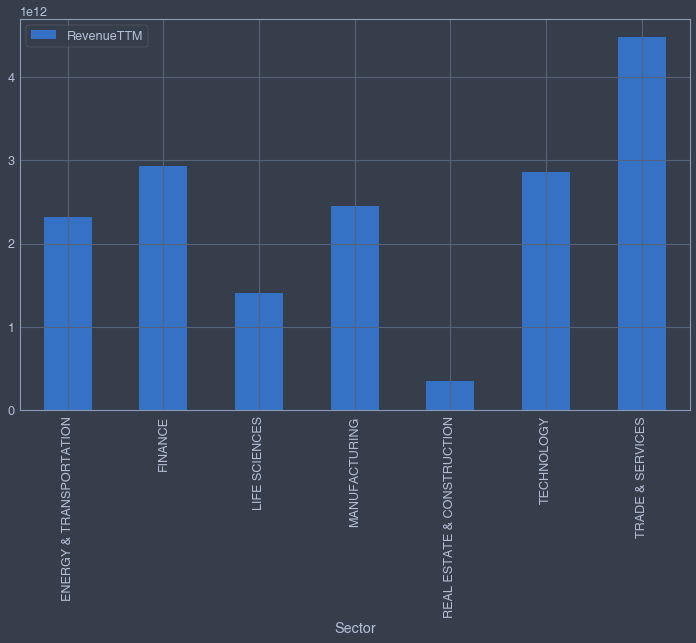

In [25]:
data.groupby('Sector').agg({'RevenueTTM': 'sum'}).plot(kind='bar')

## GrossProfitTTM

Gross profit is a company's profit after deducting the costs associated with producing and selling its products or services. It's also known as sales profit or gross income.<br><br>
$\displaystyle
Gross\ Profit = Net\ Sales - Cost\ of\ Goods\ Sold
$

In [11]:
data['GrossProfitTTM'].describe()

count    5.030000e+02
mean     1.188513e+10
std      2.367982e+10
min     -2.808700e+10
25%      2.464350e+09
50%      4.927000e+09
75%      1.007450e+10
max      2.251520e+11
Name: GrossProfitTTM, dtype: float64

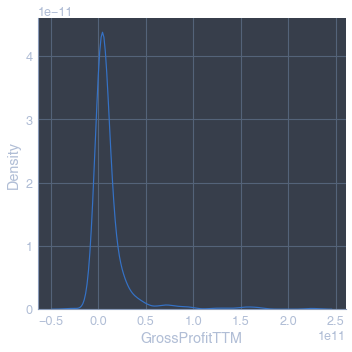

In [12]:
sns.displot(data=data, x='GrossProfitTTM', kind='kde')

In [15]:
data[data['GrossProfitTTM']<0]

,Name,Exchange,Sector,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
BRK-B,Berkshire Hathaway Inc,NYSE,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",December,2024-03-31,9.302838e+11,1.070460e+11,12.73,10.060,...,2.189,-,0.869,449.25,330.58,414.31,387.93,1.311380e+09,None,None
CINF,Cincinnati Financial Corporation,NASDAQ,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",December,2024-06-30,1.940693e+10,2.849000e+09,9.09,-158.720,...,1.853,-,0.658,128.23,94.82,117.83,111.77,1.562400e+08,2024-07-15,2024-06-18
MU,Micron Technology Inc,NASDAQ,MANUFACTURING,SEMICONDUCTORS & RELATED DEVICES,August,2024-05-31,1.027895e+11,5.989000e+09,NaN,1.115,...,5.07,16.51,1.179,157.40,61.45,127.77,101.28,1.108840e+09,2024-07-23,2024-07-08


In [21]:
gp = data['GrossProfitTTM']
bins = pd.cut(gp, 4)
results = (pd.Series(gp).groupby(bins).agg(['count', 'min', 'max', 'sum']).reset_index())
results

,GrossProfitTTM,count,min,max,sum
0,"(-28340239000.0, 35222750000.0]",469,-2.808700e+10,3.280800e+10,3.193313e+12
1,"(35222750000.0, 98532500000.0]",25,3.575300e+10,9.285500e+10,1.407874e+12
2,"(98532500000.0, 161842250000.0]",6,9.888600e+10,1.566330e+11,8.157410e+11
3,"(161842250000.0, 225152000000.0]",3,1.653590e+11,2.251520e+11,5.612930e+11


In [22]:
cat['gp_bins'] = bins
cat.groupby(['Sector', 'gp_bins']).count()['Name'].to_frame()

Name
Sector                     gp_bins                               
ENERGY & TRANSPORTATION    (-28340239000.0, 35222750000.0]     73
                           (35222750000.0, 98532500000.0]       1
                           (98532500000.0, 161842250000.0]      2
                           (161842250000.0, 225152000000.0]     0
FINANCE                    (-28340239000.0, 35222750000.0]     57
                           (35222750000.0, 98532500000.0]       7
                           (98532500000.0, 161842250000.0]      1
                           (161842250000.0, 225152000000.0]     0
LIFE SCIENCES              (-28340239000.0, 35222750000.0]     74
                           (35222750000.0, 98532500000.0]       6
                           (98532500000.0, 161842250000.0]      0
                           (161842250000.0, 225152000000.0]     0
MANUFACTURING              (-28340239000.0, 35222750000.0]     94
                           (35222750000.0, 98532500000.0]       2
                           (98532500000.0, 161842250000.0]      0
                           (161842250000.0, 225152000000.0]     0
REAL ESTATE & CONSTRUCTION (-28340239000.0, 35222750000.0]     42
                           (35222750000.0, 98532500000.0]       0
                           (98532500000.0, 161842250000.0]      0
                           (161842250000.0, 225152000000.0]     0
TECHNOLOGY                 (-28340239000.0, 35222750000.0]     58
                           (35222750000.0, 98532500000.0]       7
                           (98532500000.0, 161842250000.0]      2
                           (161842250000.0, 225152000000.0]     2
TRADE & SERVICES           (-28340239000.0, 35222750000.0]     71
                           (35222750000.0, 98532500000.0]       2
                           (98532500000.0, 161842250000.0]      1
                           (161842250000.0, 225152000000.0]     1

<AxesSubplot:xlabel='Sector'>

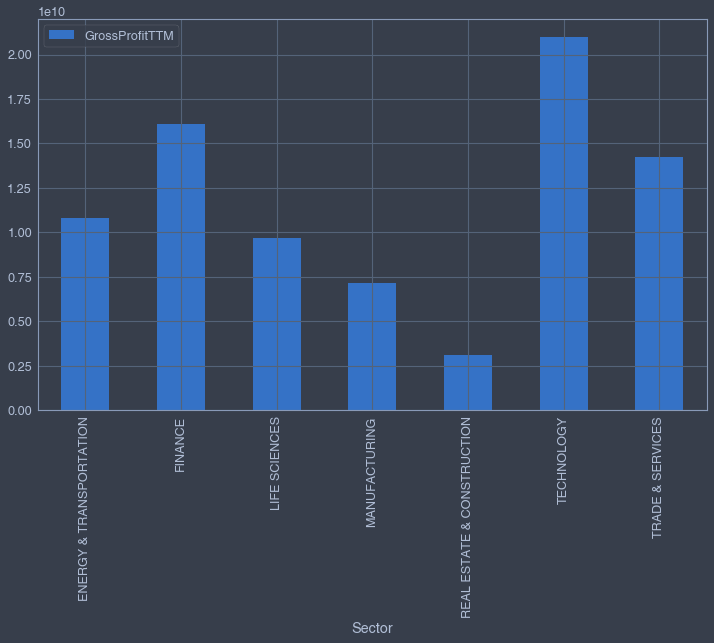

In [19]:
data.groupby('Sector').agg({'GrossProfitTTM': 'mean'}).plot(kind='bar')

### DilutedEPSTTM

Diluted EPS is a measurement used to gauge the quality of a company's earnings per share (EPS) if all convertible securities were exercised. The diluted EPS is commonly lower than the simple or basic EPS.<br><br>
$\displaystyle
Diluted\ EPS=\frac{Net\ Income - Preferred\ Dividends}{Weighted\ Average\ Shares\ Outstanding + Conversion\ Dilutive\ Securities}
$

(count    503.000000
 mean       8.162346
 std       24.152509
 min      -22.010000
 25%        2.360000
 50%        4.980000
 75%        9.080000
 max      484.140000
 Name: DilutedEPSTTM, dtype: float64,
 <seaborn.axisgrid.FacetGrid at 0xe1d8598>)

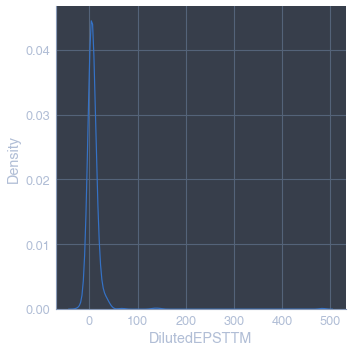

In [11]:
mi = multiplicators_info('DilutedEPSTTM')
mi['describe'], mi['dist']

In [17]:
di_eps = data['DilutedEPSTTM']
bins = pd.qcut(di_eps, 4)
results = (pd.Series(di_eps).groupby(bins).agg(['count', 'min', 'max', 'sum']).reset_index())
results

,DilutedEPSTTM,count,min,max,sum
0,"(-22.011000000000003, 2.36]",127,-22.01,2.36,-4.73
1,"(2.36, 4.98]",125,2.38,4.98,447.71
2,"(4.98, 9.08]",125,4.99,9.07,853.65
3,"(9.08, 484.14]",126,9.09,484.14,2809.03


In [18]:
cat['di_eps_bins'] = bins
cat.groupby(['Sector', 'di_eps_bins']).count()['Name'].to_frame()

Name
Sector                     di_eps_bins                      
ENERGY & TRANSPORTATION    (-22.011000000000003, 2.36]    21
                           (2.36, 4.98]                   20
                           (4.98, 9.08]                   23
                           (9.08, 484.14]                 12
FINANCE                    (-22.011000000000003, 2.36]     7
                           (2.36, 4.98]                   16
                           (4.98, 9.08]                   15
                           (9.08, 484.14]                 27
LIFE SCIENCES              (-22.011000000000003, 2.36]    24
                           (2.36, 4.98]                   16
                           (4.98, 9.08]                   25
                           (9.08, 484.14]                 15
MANUFACTURING              (-22.011000000000003, 2.36]    30
                           (2.36, 4.98]                   24
                           (4.98, 9.08]                   19
                           (9.08, 484.14]                 23
REAL ESTATE & CONSTRUCTION (-22.011000000000003, 2.36]    15
                           (2.36, 4.98]                   14
                           (4.98, 9.08]                    6
                           (9.08, 484.14]                  7
TECHNOLOGY                 (-22.011000000000003, 2.36]    14
                           (2.36, 4.98]                   19
                           (4.98, 9.08]                   20
                           (9.08, 484.14]                 16
TRADE & SERVICES           (-22.011000000000003, 2.36]    16
                           (2.36, 4.98]                   16
                           (4.98, 9.08]                   17
                           (9.08, 484.14]                 26

In [27]:
data.groupby('Sector').agg({'DilutedEPSTTM': 'mean', 'EPS': 'mean'})

,DilutedEPSTTM,EPS
Sector,,
ENERGY & TRANSPORTATION,7.259605,7.259605
FINANCE,10.492615,10.492615
LIFE SCIENCES,5.285375,5.352278
MANUFACTURING,6.141354,6.206000
REAL ESTATE & CONSTRUCTION,15.821667,15.821667
TECHNOLOGY,6.673043,6.673043
TRADE & SERVICES,9.794133,9.926486


### QuarterlyEarningsGrowthYOY

Typically, earnings growth refers to the annual  rate of earnings growth as a result of investments of financial capital in the form of cash, inventory fixed equipment, real property and human resources (payroll).
<br><br>
$\displaystyle
Earnings\ Growth\ Rate = \frac{Total\ Earnings\ for\ a\ period - Earnings\ for\ previous\ period}{Total\ Earnings\ Growth\ for\ Prior\ Period}*100
$

{'describe': count    503.000000
 mean       0.920577
 std        6.369450
 min       -0.995000
 25%       -0.163500
 50%        0.056000
 75%        0.304500
 max       82.330000
 Name: QuarterlyEarningsGrowthYOY, dtype: float64,
 'dist': <seaborn.axisgrid.FacetGrid at 0xba08b80>}

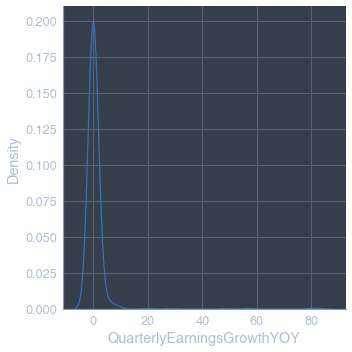

In [8]:
multiplicators_info('QuarterlyEarningsGrowthYOY')

In [16]:
data[data['QuarterlyEarningsGrowthYOY']==82.330000]

,Name,Exchange,Sector,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
CRWD,Crowdstrike Holdings Inc,NASDAQ,TECHNOLOGY,SERVICES-PREPACKAGED SOFTWARE,January,2024-04-30,6.233936e+10,145152000.0,474.37,1.12,...,18.67,169.81,1.095,398.33,140.52,352.16,291.51,230883000.0,None,None


In [23]:
data[data['QuarterlyEarningsGrowthYOY']==-0.995000]

,Name,Exchange,Sector,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
SWK,Stanley Black & Decker Inc,NYSE,MANUFACTURING,"CUTLERY, HANDTOOLS & GENERAL HARDWARE",December,2024-06-30,1.432896e+10,1.341300e+09,NaN,1.368,...,1.322,20.17,1.253,108.15,74.21,86.95,90.04,153959000.0,2024-09-17,2024-09-03


In [15]:
qeg = data['QuarterlyEarningsGrowthYOY']
bins = pd.qcut(qeg, 4)
results = (pd.Series(qeg).groupby(bins).agg(['count', 'min', 'max', 'sum']).reset_index())
results

,QuarterlyEarningsGrowthYOY,count,min,max,sum
0,"(-0.996, -0.164]",126,-0.995,-0.165,-57.860
1,"(-0.164, 0.056]",126,-0.162,0.056,-5.089
2,"(0.056, 0.304]",125,0.057,0.304,20.554
3,"(0.304, 82.33]",126,0.305,82.330,505.445


In [26]:
cat['qeg_bins'] = bins
cat.groupby(['Sector', 'qeg_bins']).count()['Name'].to_frame()

Name
Sector                     qeg_bins              
ENERGY & TRANSPORTATION    (-0.996, -0.164]    24
                           (-0.164, 0.056]     19
                           (0.056, 0.304]      16
                           (0.304, 82.33]      17
FINANCE                    (-0.996, -0.164]    12
                           (-0.164, 0.056]     17
                           (0.056, 0.304]      18
                           (0.304, 82.33]      18
LIFE SCIENCES              (-0.996, -0.164]    18
                           (-0.164, 0.056]     21
                           (0.056, 0.304]      20
                           (0.304, 82.33]      21
MANUFACTURING              (-0.996, -0.164]    32
                           (-0.164, 0.056]     19
                           (0.056, 0.304]      23
                           (0.304, 82.33]      22
REAL ESTATE & CONSTRUCTION (-0.996, -0.164]    12
                           (-0.164, 0.056]     10
                           (0.056, 0.304]      11
                           (0.304, 82.33]       9
TECHNOLOGY                 (-0.996, -0.164]    16
                           (-0.164, 0.056]     11
                           (0.056, 0.304]      18
                           (0.304, 82.33]      24
TRADE & SERVICES           (-0.996, -0.164]    12
                           (-0.164, 0.056]     29
                           (0.056, 0.304]      19
                           (0.304, 82.33]      15

### QuarterlyRevenueGrowthYOY

Quarterly revenue growth refers to an increase in the company's sales from one quarter to the next. The sales figure for the current quarter can be compared on a year-over-year basis or sequentially.<br><br>
$\displaystyle
Revenue\ Growth\ Rate = \frac{Total\ Revenue\ for\ a\ period - Revenue\ for\ previous\ period}{Total\ Revenue\ Growth\ for\ Prior\ Period}*100
$

{'describe': count    503.000000
 mean       0.050600
 std        0.178741
 min       -0.573000
 25%       -0.011500
 50%        0.042000
 75%        0.090500
 max        2.621000
 Name: QuarterlyRevenueGrowthYOY, dtype: float64,
 'dist': <seaborn.axisgrid.FacetGrid at 0xba08cd0>}

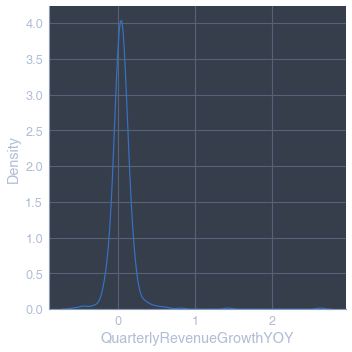

In [10]:
multiplicators_info('QuarterlyRevenueGrowthYOY')

In [13]:
qrg = data['QuarterlyRevenueGrowthYOY']
bins = pd.qcut(qrg, 4)
results = (pd.Series(qrg).groupby(bins).agg(['count', 'min', 'max', 'sum']).reset_index())
results

,QuarterlyRevenueGrowthYOY,count,min,max,sum
0,"(-0.574, -0.0115]",126,-0.573,-0.012,-11.168
1,"(-0.0115, 0.042]",128,-0.011,0.042,1.823
2,"(0.042, 0.0905]",123,0.043,0.090,8.246
3,"(0.0905, 2.621]",126,0.091,2.621,26.551


In [14]:
cat['qrg_bins'] = bins
cat.groupby(['Sector', 'qrg_bins']).count()['Name'].to_frame()

Name
Sector                     qrg_bins               
ENERGY & TRANSPORTATION    (-0.574, -0.0115]    23
                           (-0.0115, 0.042]     20
                           (0.042, 0.0905]      18
                           (0.0905, 2.621]      15
FINANCE                    (-0.574, -0.0115]     8
                           (-0.0115, 0.042]     13
                           (0.042, 0.0905]      16
                           (0.0905, 2.621]      28
LIFE SCIENCES              (-0.574, -0.0115]    27
                           (-0.0115, 0.042]     20
                           (0.042, 0.0905]      20
                           (0.0905, 2.621]      13
MANUFACTURING              (-0.574, -0.0115]    37
                           (-0.0115, 0.042]     21
                           (0.042, 0.0905]      18
                           (0.0905, 2.621]      20
REAL ESTATE & CONSTRUCTION (-0.574, -0.0115]     5
                           (-0.0115, 0.042]      8
                           (0.042, 0.0905]      16
                           (0.0905, 2.621]      13
TECHNOLOGY                 (-0.574, -0.0115]    17
                           (-0.0115, 0.042]     17
                           (0.042, 0.0905]      14
                           (0.0905, 2.621]      21
TRADE & SERVICES           (-0.574, -0.0115]     9
                           (-0.0115, 0.042]     29
                           (0.042, 0.0905]      21
                           (0.0905, 2.621]      16

### 52WeekLow / 52WeekHigh

{'describe': count     503.000000
 mean      150.264990
 std       303.064851
 min         6.730000
 25%        47.060000
 50%        86.970000
 75%       168.425000
 max      5210.490000
 Name: 52WeekLow, dtype: float64,
 'dist': <seaborn.axisgrid.FacetGrid at 0xbbb8dc0>}

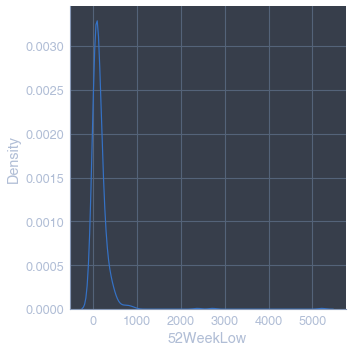

In [9]:
multiplicators_info('52WeekLow')

{'describe': count     503.000000
 mean      237.645229
 std       491.076486
 min        10.480000
 25%        72.450000
 50%       139.350000
 75%       259.925000
 max      8700.000000
 Name: 52WeekHigh, dtype: float64,
 'dist': <seaborn.axisgrid.FacetGrid at 0xc1fccd0>}

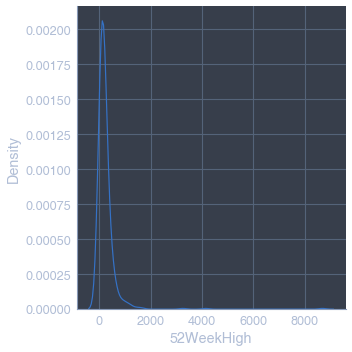

In [10]:
multiplicators_info('52WeekHigh')

<AxesSubplot:ylabel='Sector'>

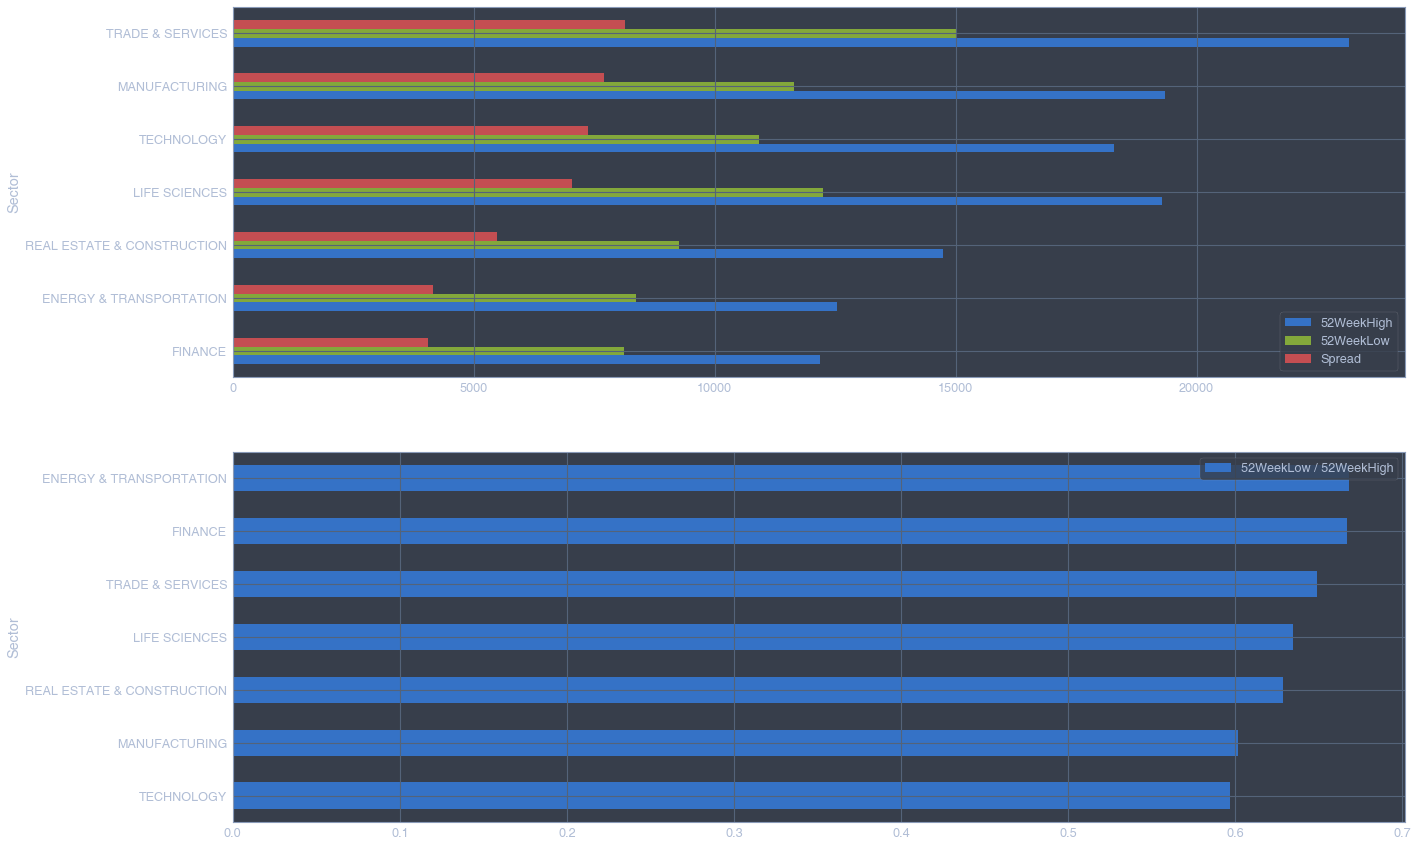

In [22]:
_52_week_by_sectors = data.groupby('Sector').sum()[['52WeekHigh', '52WeekLow']].copy()
_52_week_by_sectors['Spread'] = _52_week_by_sectors['52WeekHigh'] - _52_week_by_sectors['52WeekLow']
low_high = (_52_week_by_sectors['52WeekLow'] / _52_week_by_sectors['52WeekHigh']).to_frame().sort_values(0)
low_high.rename(columns={0: '52WeekLow / 52WeekHigh'}, inplace=True)

fig, ax = plt.subplots(2, 1, figsize=(21, 15))
_52_week_by_sectors.sort_values('Spread').plot(kind='barh', ax=ax[0])
low_high.plot(kind='barh', ax=ax[1])

In [15]:
data[data['Beta']>1].groupby('Sector').count()

,Name,Exchange,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,BookValue,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Sector,,,,,,,,,,,,,,,,,,,,,
ENERGY & TRANSPORTATION,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
FINANCE,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
LIFE SCIENCES,15,15,15,15,15,15,15,13,15,15,...,15,15,15,15,15,15,15,15,15,15
MANUFACTURING,19,19,19,19,19,19,19,18,19,19,...,19,19,19,19,19,19,19,19,19,19
REAL ESTATE & CONSTRUCTION,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
TECHNOLOGY,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
TRADE & SERVICES,19,19,19,19,19,19,19,18,19,19,...,19,19,19,19,19,19,19,19,19,19


In [16]:
data[(data['Beta']>1) & (data['Sector']=='TECHNOLOGY')].groupby('Industry').count()

,Name,Exchange,Sector,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,BookValue,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Industry,,,,,,,,,,,,,,,,,,,,,
AIR-COND & WARM AIR HEATG EQUIP & COMM & INDL REFRIG EQUIP,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CABLE & OTHER PAY TELEVISION SERVICES,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
COMPUTER COMMUNICATIONS EQUIPMENT,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
CONSTRUCTION MACHINERY & EQUIP,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"CONSTRUCTION, MINING & MATERIALS HANDLING MACHINERY & EQUIP",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ELECTRONIC COMPUTERS,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MISC INDUSTRIAL & COMMERCIAL MACHINERY & EQUIPMENT,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
OIL & GAS FIELD MACHINERY & EQUIPMENT,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
SERVICES-COMPUTER INTEGRATED SYSTEMS DESIGN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [12]:
data[data['EPS']<0][['Name', 'PERatio', 'PEGRatio', 'Beta', 'DividendPerShare', 'DividendYield']]

,Name,PERatio,PEGRatio,Beta,DividendPerShare,DividendYield
Symbol,,,,,,
MMM,3M Company,NaN,1.905,1.001,8.79,0.0267
BAX,Baxter International Inc,NaN,1.696,0.574,16.04,0.0327
BIO,Bio-Rad Laboratories Inc,NaN,1.190,0.930,317.32,NaN
BA,The Boeing Company,NaN,6.530,1.562,-27.73,NaN
BMY,Bristol-Myers Squibb Company,NaN,31.350,0.439,8.13,0.0558
CTLT,Catalent Inc,NaN,2.057,1.161,19.96,NaN
DLTR,Dollar Tree Inc,NaN,2.138,0.886,33.83,NaN
ES,Eversource Energy,NaN,2.006,0.604,41.39,0.0443
HAS,Hasbro Inc,NaN,0.780,0.607,8.41,0.0434


In [17]:
summ = data.groupby('Sector').agg({'Name': 'count',
                                   'MarketCapitalization': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                                   'EBITDA': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                                   'BookValue': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                                   'DividendYield': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                                   'EPS': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                                   'RevenuePerShareTTM': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                                   'ProfitMargin': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                                   'OperatingMarginTTM': ['min', 'idxmin', 'max', 'idxmax'],
                                   'ReturnOnAssetsTTM': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                                   'ReturnOnEquityTTM': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                                   'RevenueTTM': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                                   'QuarterlyEarningsGrowthYOY': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                                   'QuarterlyRevenueGrowthYOY': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                                  })
summ

Name MarketCapitalization                       \
                           count                  sum           min idxmin   
Sector                                                                       
ENERGY & TRANSPORTATION       76         3.937475e+12  6.665545e+09    AAL   
FINANCE                       65         5.839731e+12  7.569538e+09    IVZ   
LIFE SCIENCES                 80         6.106090e+12  8.127291e+09    FMC   
MANUFACTURING                 96         9.506932e+12  7.283981e+09    BWA   
REAL ESTATE & CONSTRUCTION    42         1.435258e+12  7.183762e+09    CZR   
TECHNOLOGY                    69         1.665179e+13  7.502204e+09   PARA   
TRADE & SERVICES              75         7.661104e+12  7.493067e+09   ETSY   

                                                       EBITDA                \
                                     max idxmax           sum           min   
Sector                                                                        
ENERGY & TRANSPORTATION     5.208165e+11    XOM  5.409302e+11  6.076360e+08   
FINANCE                     9.302838e+11  BRK-B  2.989672e+11  3.844590e+08   
LIFE SCIENCES               7.243399e+11    LLY  3.872523e+11 -4.107000e+09   
MANUFACTURING               3.089792e+12   NVDA  4.479236e+11  1.694130e+08   
REAL ESTATE & CONSTRUCTION  1.101279e+11    PLD  1.091351e+11  7.140900e+08   
TECHNOLOGY                  3.450326e+12   AAPL  9.456314e+11  1.451520e+08   
TRADE & SERVICES            1.899725e+12   AMZN  4.651362e+11  1.580340e+08   

                                                 ...  \
                           idxmin           max  ...   
Sector                                           ...   
ENERGY & TRANSPORTATION      CHRW  6.768900e+10  ...   
FINANCE                      MKTX  1.070460e+11  ...   
LIFE SCIENCES                MRNA  3.305500e+10  ...   
MANUFACTURING                ENPH  4.927500e+10  ...   
REAL ESTATE & CONSTRUCTION    FRT  7.003500e+09  ...   
TECHNOLOGY                   CRWD  1.296290e+11  ...   
TRADE & SERVICES             INCY  9.660900e+10  ...   

                           QuarterlyEarningsGrowthYOY                        \
                                                  sum    min idxmin     max   
Sector                                                                        
ENERGY & TRANSPORTATION                        20.233 -0.925    EQT   7.660   
FINANCE                                        72.776 -0.676    ALL  57.000   
LIFE SCIENCES                                  53.414 -0.982    PFE  28.700   
MANUFACTURING                                  95.236 -0.995    SWK  48.690   
REAL ESTATE & CONSTRUCTION                      4.338 -0.923    UDR   1.722   
TECHNOLOGY                                    195.644 -0.959    WDC  82.330   
TRADE & SERVICES                               21.409 -0.882     KR   6.710   

                                  QuarterlyRevenueGrowthYOY                \
                           idxmax                       sum    min idxmin   
Sector                                                                      
ENERGY & TRANSPORTATION       MLM                     2.534 -0.174    NEE   
FINANCE                       AIG                     6.013 -0.142    COF   
LIFE SCIENCES                TRMB                     0.982 -0.473    ALB   
MANUFACTURING                 AMD                     4.380 -0.573   ENPH   
REAL ESTATE & CONSTRUCTION    AMT                     3.248 -0.163    PLD   
TECHNOLOGY                   CRWD                     4.543 -0.410    WDC   
TRADE & SERVICES             INCY                     3.752 -0.065    BBY   

                                          
                              max idxmax  
Sector                                    
ENERGY & TRANSPORTATION     0.641    NEM  
FINANCE                     0.527   NTRS  
LIFE SCIENCES               0.260    LLY  
MANUFACTURING               2.621   NVDA  
REAL ESTATE & CONSTRUCTION  0.58

In [18]:
summ_pv = pd.DataFrame(columns=summ.index, index=summ.columns, data=summ.to_numpy().transpose())
summ_pv

Sector                           ENERGY & TRANSPORTATION          FINANCE  \
Name                      count                       76               65   
MarketCapitalization      sum            3937474796000.0  5839730836000.0   
                          min               6665545000.0     7569538000.0   
                          idxmin                     AAL              IVZ   
                          max             520816460000.0   930283848000.0   
...                                                  ...              ...   
QuarterlyRevenueGrowthYOY sum                      2.534            6.013   
                          min                     -0.174           -0.142   
                          idxmin                     NEE              COF   
                          max                      0.641            0.527   
                          idxmax                     NEM             NTRS   

Sector                              LIFE SCIENCES    MANUFACTURING  \
Name                      count                80               96   
MarketCapitalization      sum     6106090411000.0  9506932468000.0   
                          min        8127291000.0     7283981000.0   
                          idxmin              FMC              BWA   
                          max      724339851000.0  3089792500000.0   
...                                           ...              ...   
QuarterlyRevenueGrowthYOY sum               0.982             4.38   
                          min              -0.473           -0.573   
                          idxmin              ALB             ENPH   
                          max                0.26            2.621   
                          idxmax              LLY             NVDA   

Sector                           REAL ESTATE & CONSTRUCTION        TECHNOLOGY  \
Name                      count                          42                69   
MarketCapitalization      sum               1435257707000.0  16651791468000.0   
                          min                  7183762000.0      7502204000.0   
                          idxmin                        CZR              PARA   
                          max                110127858000.0   3450325697000.0   
...                                                     ...               ...   
QuarterlyRevenueGrowthYOY sum                         3.248             4.543   
                          min                        -0.163             -0.41   
                          idxmin                        PLD               WDC   
                          max                         0.587              1.43   
                          idxmax                        EXR              SMCI   

Sector                           TRADE & SERVICES  
Name                      count                75  
MarketCapitalization      sum     7661103622000.0  
                          min        7493067000.0  
                          idxmin             ETSY  
                          max     1899724800000.0  
...                                           ...  
QuarterlyRevenueGrowthYOY sum               3.752  
                          min              -0.065  
                          idxmin              BBY  
                          max               0.216  
                          idxmax              MCO  

[65 rows x 7 columns]

In [19]:
summ_pv.loc[:, 'idxmin', :]

,Sector,ENERGY & TRANSPORTATION,FINANCE,LIFE SCIENCES,MANUFACTURING,REAL ESTATE & CONSTRUCTION,TECHNOLOGY,TRADE & SERVICES
MarketCapitalization,idxmin,AAL,IVZ,FMC,BWA,CZR,PARA,ETSY
EBITDA,idxmin,CHRW,MKTX,MRNA,ENPH,FRT,CRWD,INCY
BookValue,idxmin,BKNG,AON,MTD,TDG,SBAC,VRSN,AZO
DividendYield,idxmin,PCG,PGR,GEHC,TDG,PWR,IR,MCK
EPS,idxmin,NEM,TFC,MRNA,HAS,VTR,TTWO,WBA
RevenuePerShareTTM,idxmin,KMI,HBAN,TECH,NVDA,KIM,GEN,CPRT
ProfitMargin,idxmin,NEM,TFC,MRNA,HAS,VTR,TTWO,FIS
OperatingMarginTTM,idxmin,EQT,CI,MRNA,INTC,CBRE,WBD,INCY
ReturnOnAssetsTTM,idxmin,LUV,TFC,MRNA,MU,DLR,TTWO,CSGP
ReturnOnEquityTTM,idxmin,NEM,TFC,MMM,HAS,WYNN,TTWO,ETSY


In [20]:
summ_pv.loc[:, 'idxmin', :].mode()

Sector,ENERGY & TRANSPORTATION,FINANCE,LIFE SCIENCES,MANUFACTURING,REAL ESTATE & CONSTRUCTION,TECHNOLOGY,TRADE & SERVICES
0,NEM,TFC,MRNA,ENPH,FRT,TTWO,ETSY
1,NaN,NaN,NaN,HAS,VTR,NaN,INCY


In [21]:
summ_pv.loc[:, 'idxmax', :]

,Sector,ENERGY & TRANSPORTATION,FINANCE,LIFE SCIENCES,MANUFACTURING,REAL ESTATE & CONSTRUCTION,TECHNOLOGY,TRADE & SERVICES
MarketCapitalization,idxmax,XOM,BRK-B,LLY,NVDA,PLD,AAPL,AMZN
EBITDA,idxmax,XOM,BRK-B,MRK,NVDA,AMT,AAPL,AMZN
BookValue,idxmax,MLM,BRK-B,BIO,TDY,NVR,SMCI,URI
DividendYield,idxmax,KMI,BEN,PFE,MO,CCI,VZ,WBA
EPS,idxmax,BKNG,EG,REGN,DECK,NVR,DE,AZO
RevenuePerShareTTM,idxmax,BKNG,BRK-B,HCA,BG,NVR,CHTR,MCK
ProfitMargin,idxmax,FANG,CME,JNJ,EMR,VICI,VRSN,V
OperatingMarginTTM,idxmax,FANG,TFC,MRK,NVDA,VICI,VRSN,V
ReturnOnAssetsTTM,idxmax,ODFL,MKTX,IDXX,NVDA,NVR,VRSN,DPZ
ReturnOnEquityTTM,idxmax,BKNG,AON,CLX,MSI,SPG,VRSK,COR


In [22]:
summ_pv.loc[:, 'idxmax', :].mode()

Sector,ENERGY & TRANSPORTATION,FINANCE,LIFE SCIENCES,MANUFACTURING,REAL ESTATE & CONSTRUCTION,TECHNOLOGY,TRADE & SERVICES
0,BKNG,BRK-B,JNJ,NVDA,NVR,AAPL,AMZN
1,XOM,NaN,LLY,NaN,NaN,VRSN,V
2,NaN,NaN,MRK,NaN,NaN,NaN,NaN


In [31]:
data[multps['capital']+['Sector']].groupby('Sector').agg(['sum', 'min', 'idxmin', 'max', 'idxmax'])

MarketCapitalization                       \
                                            sum           min idxmin   
Sector                                                                 
ENERGY & TRANSPORTATION            3.937475e+12  6.665545e+09    AAL   
FINANCE                            5.839731e+12  7.569538e+09    IVZ   
LIFE SCIENCES                      6.106090e+12  8.127291e+09    FMC   
MANUFACTURING                      9.506932e+12  7.283981e+09    BWA   
REAL ESTATE & CONSTRUCTION         1.435258e+12  7.183762e+09    CZR   
TECHNOLOGY                         1.665179e+13  7.502204e+09   PARA   
TRADE & SERVICES                   7.661104e+12  7.493067e+09   ETSY   

                                                       EBITDA                \
                                     max idxmax           sum           min   
Sector                                                                        
ENERGY & TRANSPORTATION     5.208165e+11    XOM  5.409302e+11  6.076360e+08   
FINANCE                     9.302838e+11  BRK-B  2.989672e+11  3.844590e+08   
LIFE SCIENCES               7.243399e+11    LLY  3.872523e+11 -4.107000e+09   
MANUFACTURING               3.089792e+12   NVDA  4.479236e+11  1.694130e+08   
REAL ESTATE & CONSTRUCTION  1.101279e+11    PLD  1.091351e+11  7.140900e+08   
TECHNOLOGY                  3.450326e+12   AAPL  9.456314e+11  1.451520e+08   
TRADE & SERVICES            1.899725e+12   AMZN  4.651362e+11  1.580340e+08   

                                                        ...    RevenueTTM  \
                           idxmin           max idxmax  ...           sum   
Sector                                                  ...                 
ENERGY & TRANSPORTATION      CHRW  6.768900e+10    XOM  ...  2.313255e+12   
FINANCE                      MKTX  1.070460e+11  BRK-B  ...  2.930276e+12   
LIFE SCIENCES                MRNA  3.305500e+10    MRK  ...  1.401526e+12   
MANUFACTURING                ENPH  4.927500e+10   NVDA  ...  2.446852e+12   
REAL ESTATE & CONSTRUCTION    FRT  7.003500e+09    AMT  ...  3.518662e+11   
TECHNOLOGY                   CRWD  1.296290e+11   AAPL  ...  2.864225e+12   
TRADE & SERVICES             INCY  9.660900e+10   AMZN  ...  4.473900e+12   

                                                                      \
                                     min idxmin           max idxmax   
Sector                                                                 
ENERGY & TRANSPORTATION     3.981000e+09    LNT  3.353510e+11    XOM   
FINANCE                     7.596960e+08   MKTX  3.854390e+11    UNH   
LIFE SCIENCES               1.154281e+09   TECH  8.657600e+10    JNJ   
MANUFACTURING               1.420449e+09   ENPH  1.803480e+11      F   
REAL ESTATE & CONSTRUCTION  1.153803e+09    FRT  3.730280e+10    DHI   
TECHNOLOGY                  1.528100e+09   VRSN  3.816230e+11   AAPL   
TRADE & SERVICES            1.604289e+09   FICO  6.573320e+11    WMT   

                           GrossProfitTTM                                     \
                                      sum           min idxmin           max   
Sector                                                                         
ENERGY & TRANSPORTATION      8.229753e+11  5.766740e+08   NCLH  1.337150e+11   
FINANCE                      1.047891e+12 -2.808700e+10  BRK-B  1.223060e+11   
LIFE SCIENCES                7.754707e+11  0.000000e+00   SOLV  6.623300e+10   
MANUFACTURING                6.875141e+11 -1.416000e+09     MU  4.605000e+10   
REAL ESTATE & CONSTRUCTION   1.293021e+11  7.305800e+08    FRT  8.912500e+09   
TECHNOLOGY                   1.446299e+12  5.556000e+08    DAY  1.707820e+11   
TRADE & SERVICES             1.068769e+12  0.000000e+00   CPAY  2.251520e+11   

                                   
                           idxmax  
Sector                             
ENERGY & TRANSPORTATION       XOM  
FINANCE                       JPM  
LIFE SCIENCES                 PFE  
MANUFA